In [73]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)
library(UBL)

set.seed(1)




options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 500)

load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df_finale.Rdata")

df <- df_finale


## Data partition

In [74]:
set.seed(1)


sample <- sample.split(df$deg_cat, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [75]:
prop.table(table(test$deg_cat))


     fast   NotFast 
0.3350923 0.6649077 

In [76]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


   fast NotFast 
    441     442 

## Model

In [77]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [78]:
#Boosted Logistic Regression
model_logitBoost <- train(deg_cat ~ . , data = train,
               method = "LogitBoost", trControl = ctrl) 



+ Fold01.Rep1: nIter=31 
- Fold01.Rep1: nIter=31 
+ Fold02.Rep1: nIter=31 
- Fold02.Rep1: nIter=31 
+ Fold03.Rep1: nIter=31 
- Fold03.Rep1: nIter=31 
+ Fold04.Rep1: nIter=31 
- Fold04.Rep1: nIter=31 
+ Fold05.Rep1: nIter=31 
- Fold05.Rep1: nIter=31 
+ Fold06.Rep1: nIter=31 
- Fold06.Rep1: nIter=31 
+ Fold07.Rep1: nIter=31 
- Fold07.Rep1: nIter=31 
+ Fold08.Rep1: nIter=31 
- Fold08.Rep1: nIter=31 
+ Fold09.Rep1: nIter=31 
- Fold09.Rep1: nIter=31 
+ Fold10.Rep1: nIter=31 
- Fold10.Rep1: nIter=31 
Aggregating results
Selecting tuning parameters
Fitting nIter = 20 on full training set


In [79]:
#Regularized Logistic Regression
model_regLogistic <- train(deg_cat ~ . , data = train,
               method = "regLogistic",
               trControl = ctrl)    # metric = "..." ciò che voglio massimizzare

+ Fold01.Rep1: cost=0.001178, loss=L1, epsilon=1 
- Fold01.Rep1: cost=0.001178, loss=L1, epsilon=1 
+ Fold01.Rep1: cost=0.554678, loss=L2_primal, epsilon=1 
- Fold01.Rep1: cost=0.554678, loss=L2_primal, epsilon=1 
+ Fold01.Rep1: cost=0.004559, loss=L1, epsilon=1 
- Fold01.Rep1: cost=0.004559, loss=L1, epsilon=1 
+ Fold02.Rep1: cost=0.001178, loss=L1, epsilon=1 
- Fold02.Rep1: cost=0.001178, loss=L1, epsilon=1 
+ Fold02.Rep1: cost=0.554678, loss=L2_primal, epsilon=1 
- Fold02.Rep1: cost=0.554678, loss=L2_primal, epsilon=1 
+ Fold02.Rep1: cost=0.004559, loss=L1, epsilon=1 
- Fold02.Rep1: cost=0.004559, loss=L1, epsilon=1 
+ Fold03.Rep1: cost=0.001178, loss=L1, epsilon=1 
- Fold03.Rep1: cost=0.001178, loss=L1, epsilon=1 
+ Fold03.Rep1: cost=0.554678, loss=L2_primal, epsilon=1 
- Fold03.Rep1: cost=0.554678, loss=L2_primal, epsilon=1 
+ Fold03.Rep1: cost=0.004559, loss=L1, epsilon=1 
- Fold03.Rep1: cost=0.004559, loss=L1, epsilon=1 
+ Fold04.Rep1: cost=0.001178, loss=L1, epsilon=1 
- Fold04

## Results

Boosted Logistic Regression 

883 samples
 73 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 795, 794, 795, 794, 795, 795, ... 
Resampling results across tuning parameters:

  nIter  Accuracy   Kappa    
  20     0.7578904  0.5161819
  27     0.6943565  0.3887760
  31     0.7111721  0.4224342

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was nIter = 20.


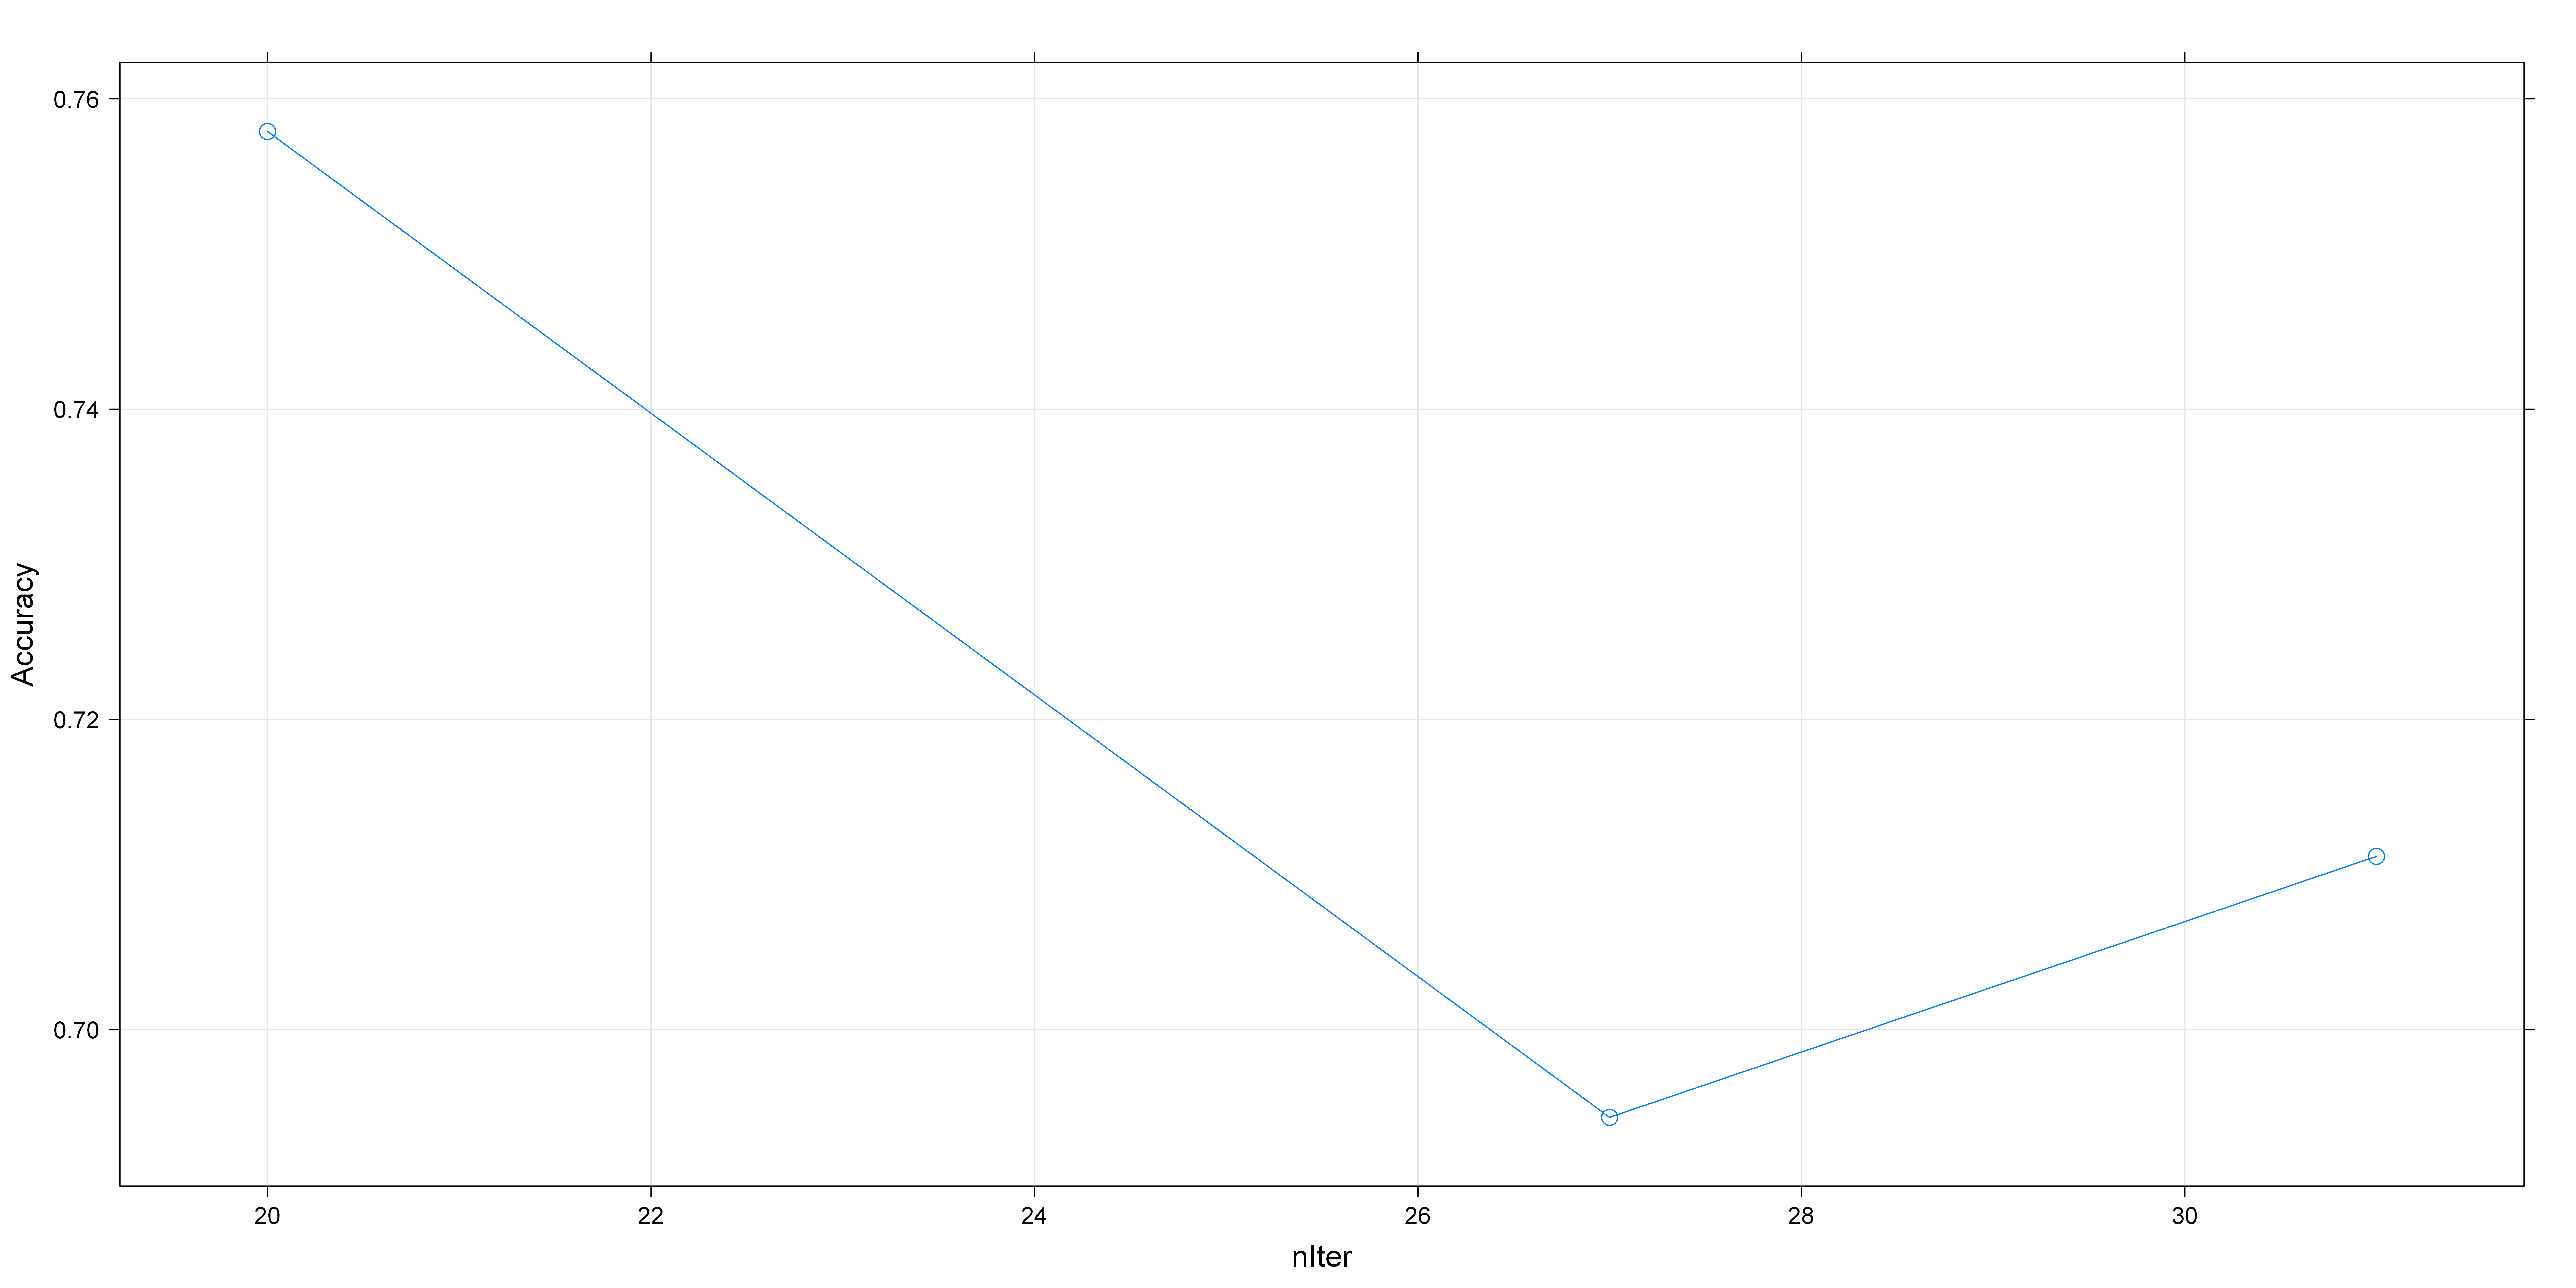

In [80]:
print(model_logitBoost)
plot(model_logitBoost,  cex= 1.5,  xlab = list( cex = 1.4), ylab = list( cex = 1.4), scales = list(x = list(cex=1.1),y=list(cex=1.1)))

Regularized Logistic Regression 

883 samples
 73 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 795, 794, 795, 795, 794, 795, ... 
Resampling results across tuning parameters:

  cost         loss       Accuracy   Kappa    
  0.001177598  L1         0.4994382  0.0000000
  0.004559305  L1         0.4994382  0.0000000
  0.554678145  L2_primal  0.7315373  0.4629925

Tuning parameter 'epsilon' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were cost = 0.5546781, loss = L2_primal
 and epsilon = 1.


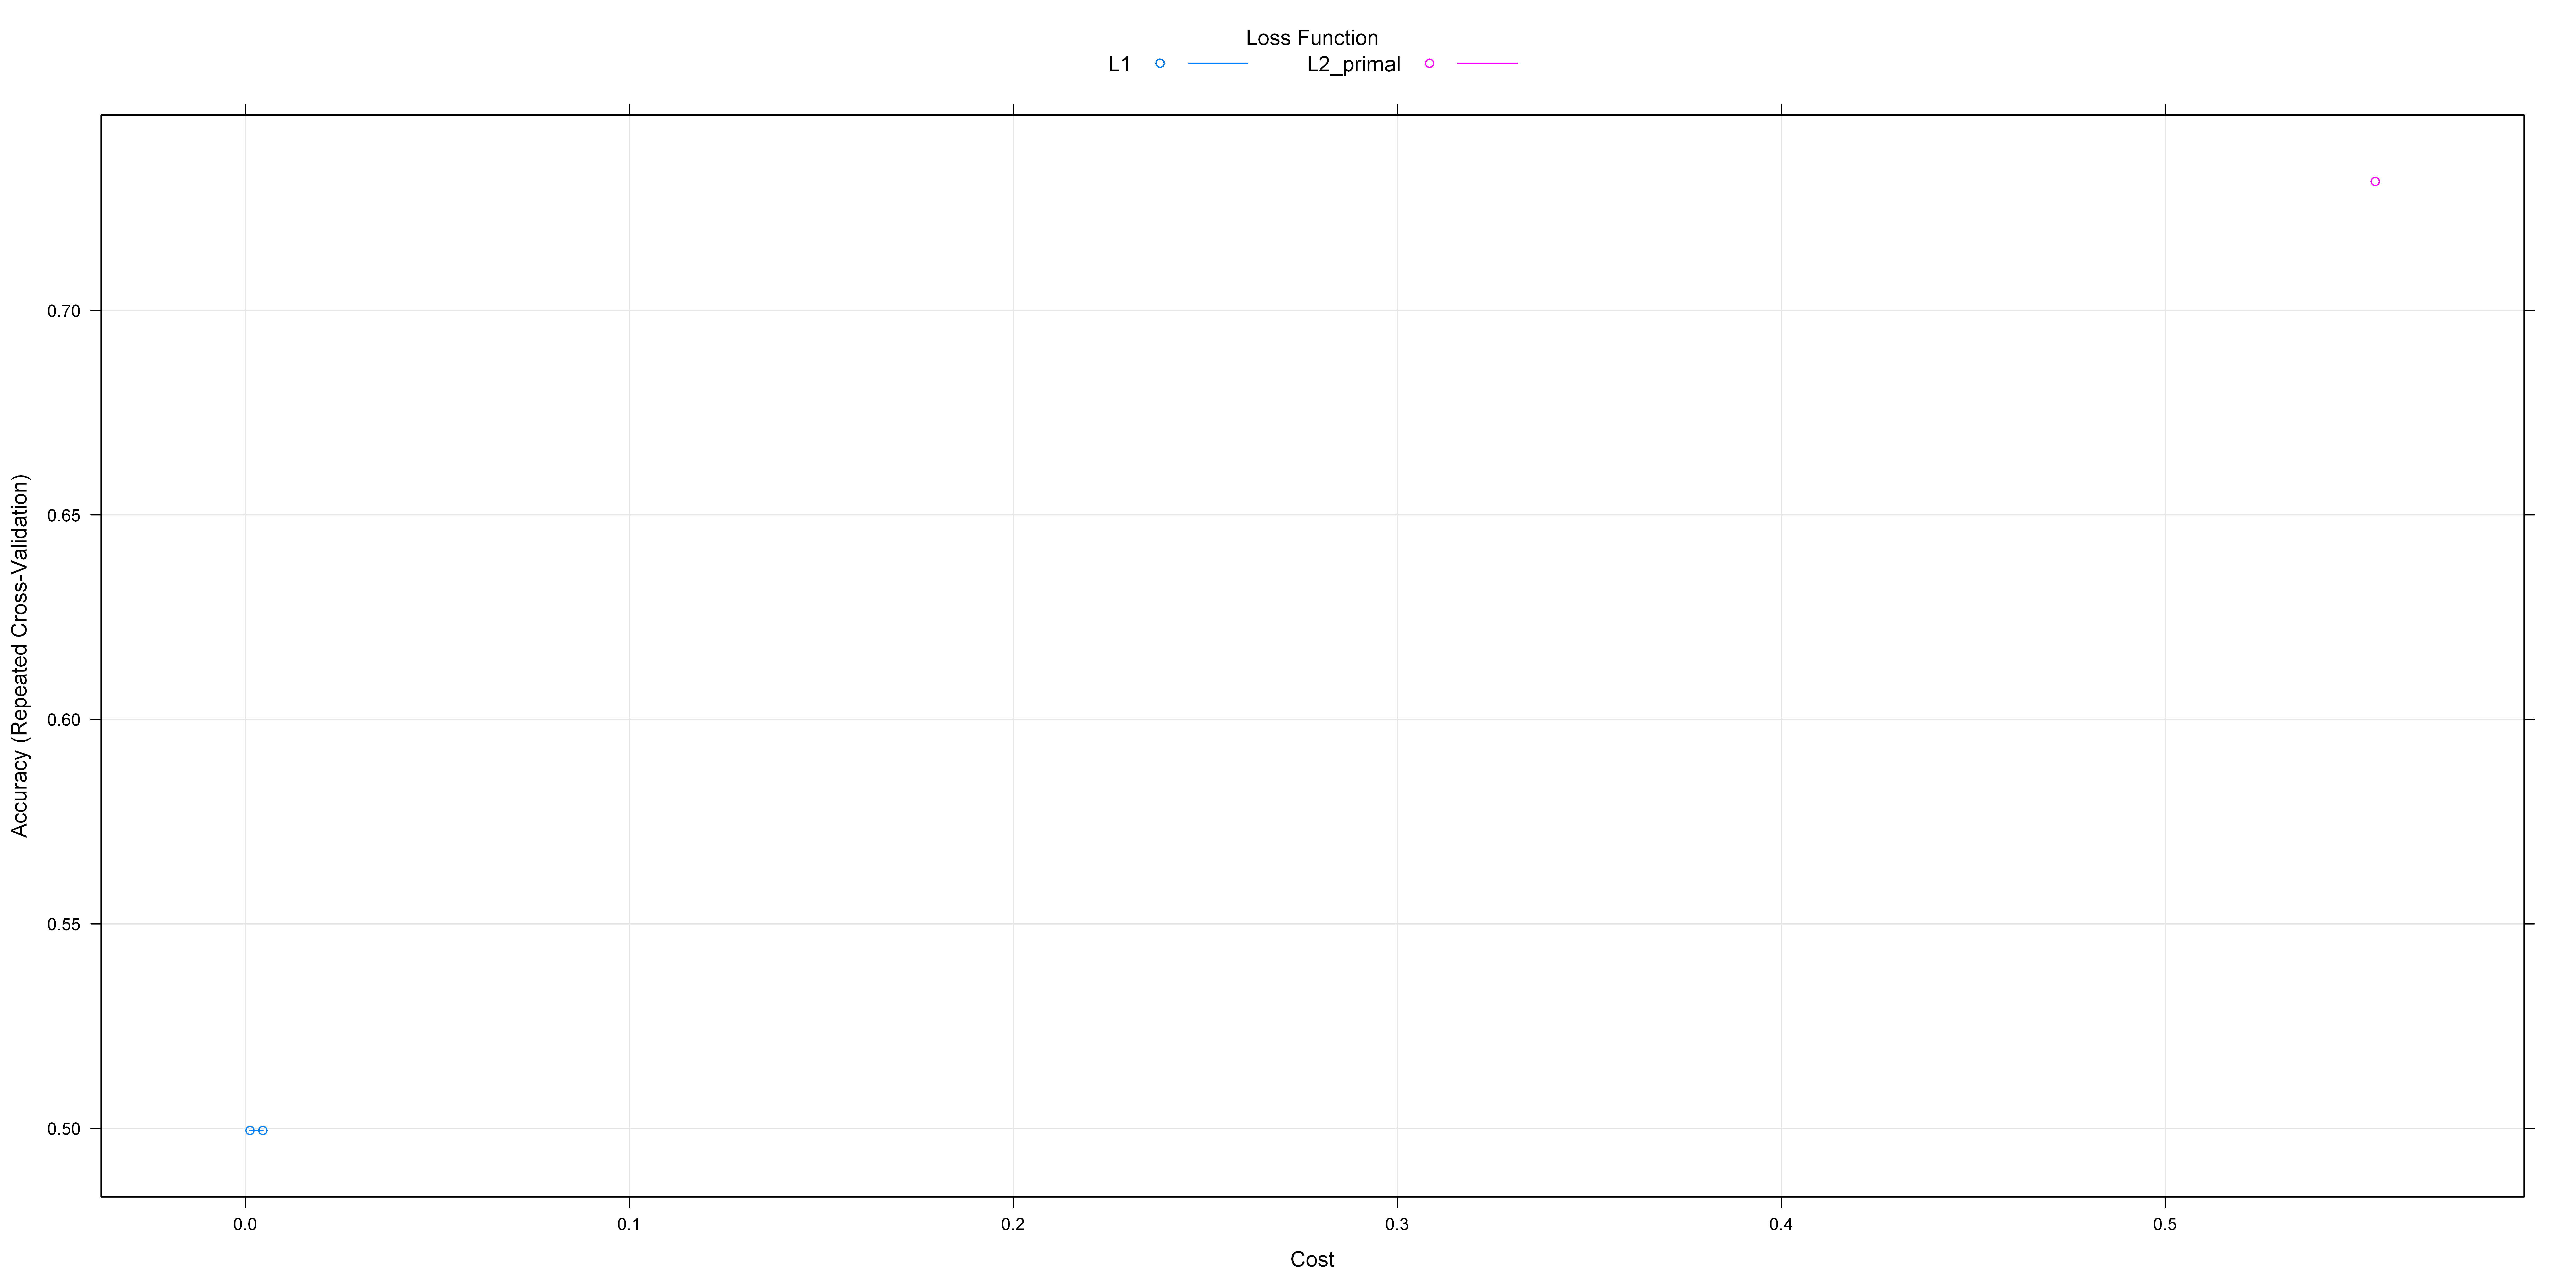

In [81]:
print(model_regLogistic)
plot(model_regLogistic)


Call:
summary.resamples(object = results)

Models: logitBoost, regLogistic 
Number of resamples: 10 

Accuracy 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.6774194 0.7022665 0.7656740 0.7578904 0.8072251 0.8421053    0
regLogistic 0.6136364 0.7280388 0.7386364 0.7315373 0.7471591 0.7977528    0

Kappa 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.3541667 0.4117052 0.5327746 0.5161819 0.6065578 0.6843077    0
regLogistic 0.2272727 0.4560606 0.4772727 0.4629925 0.4943182 0.5952501    0


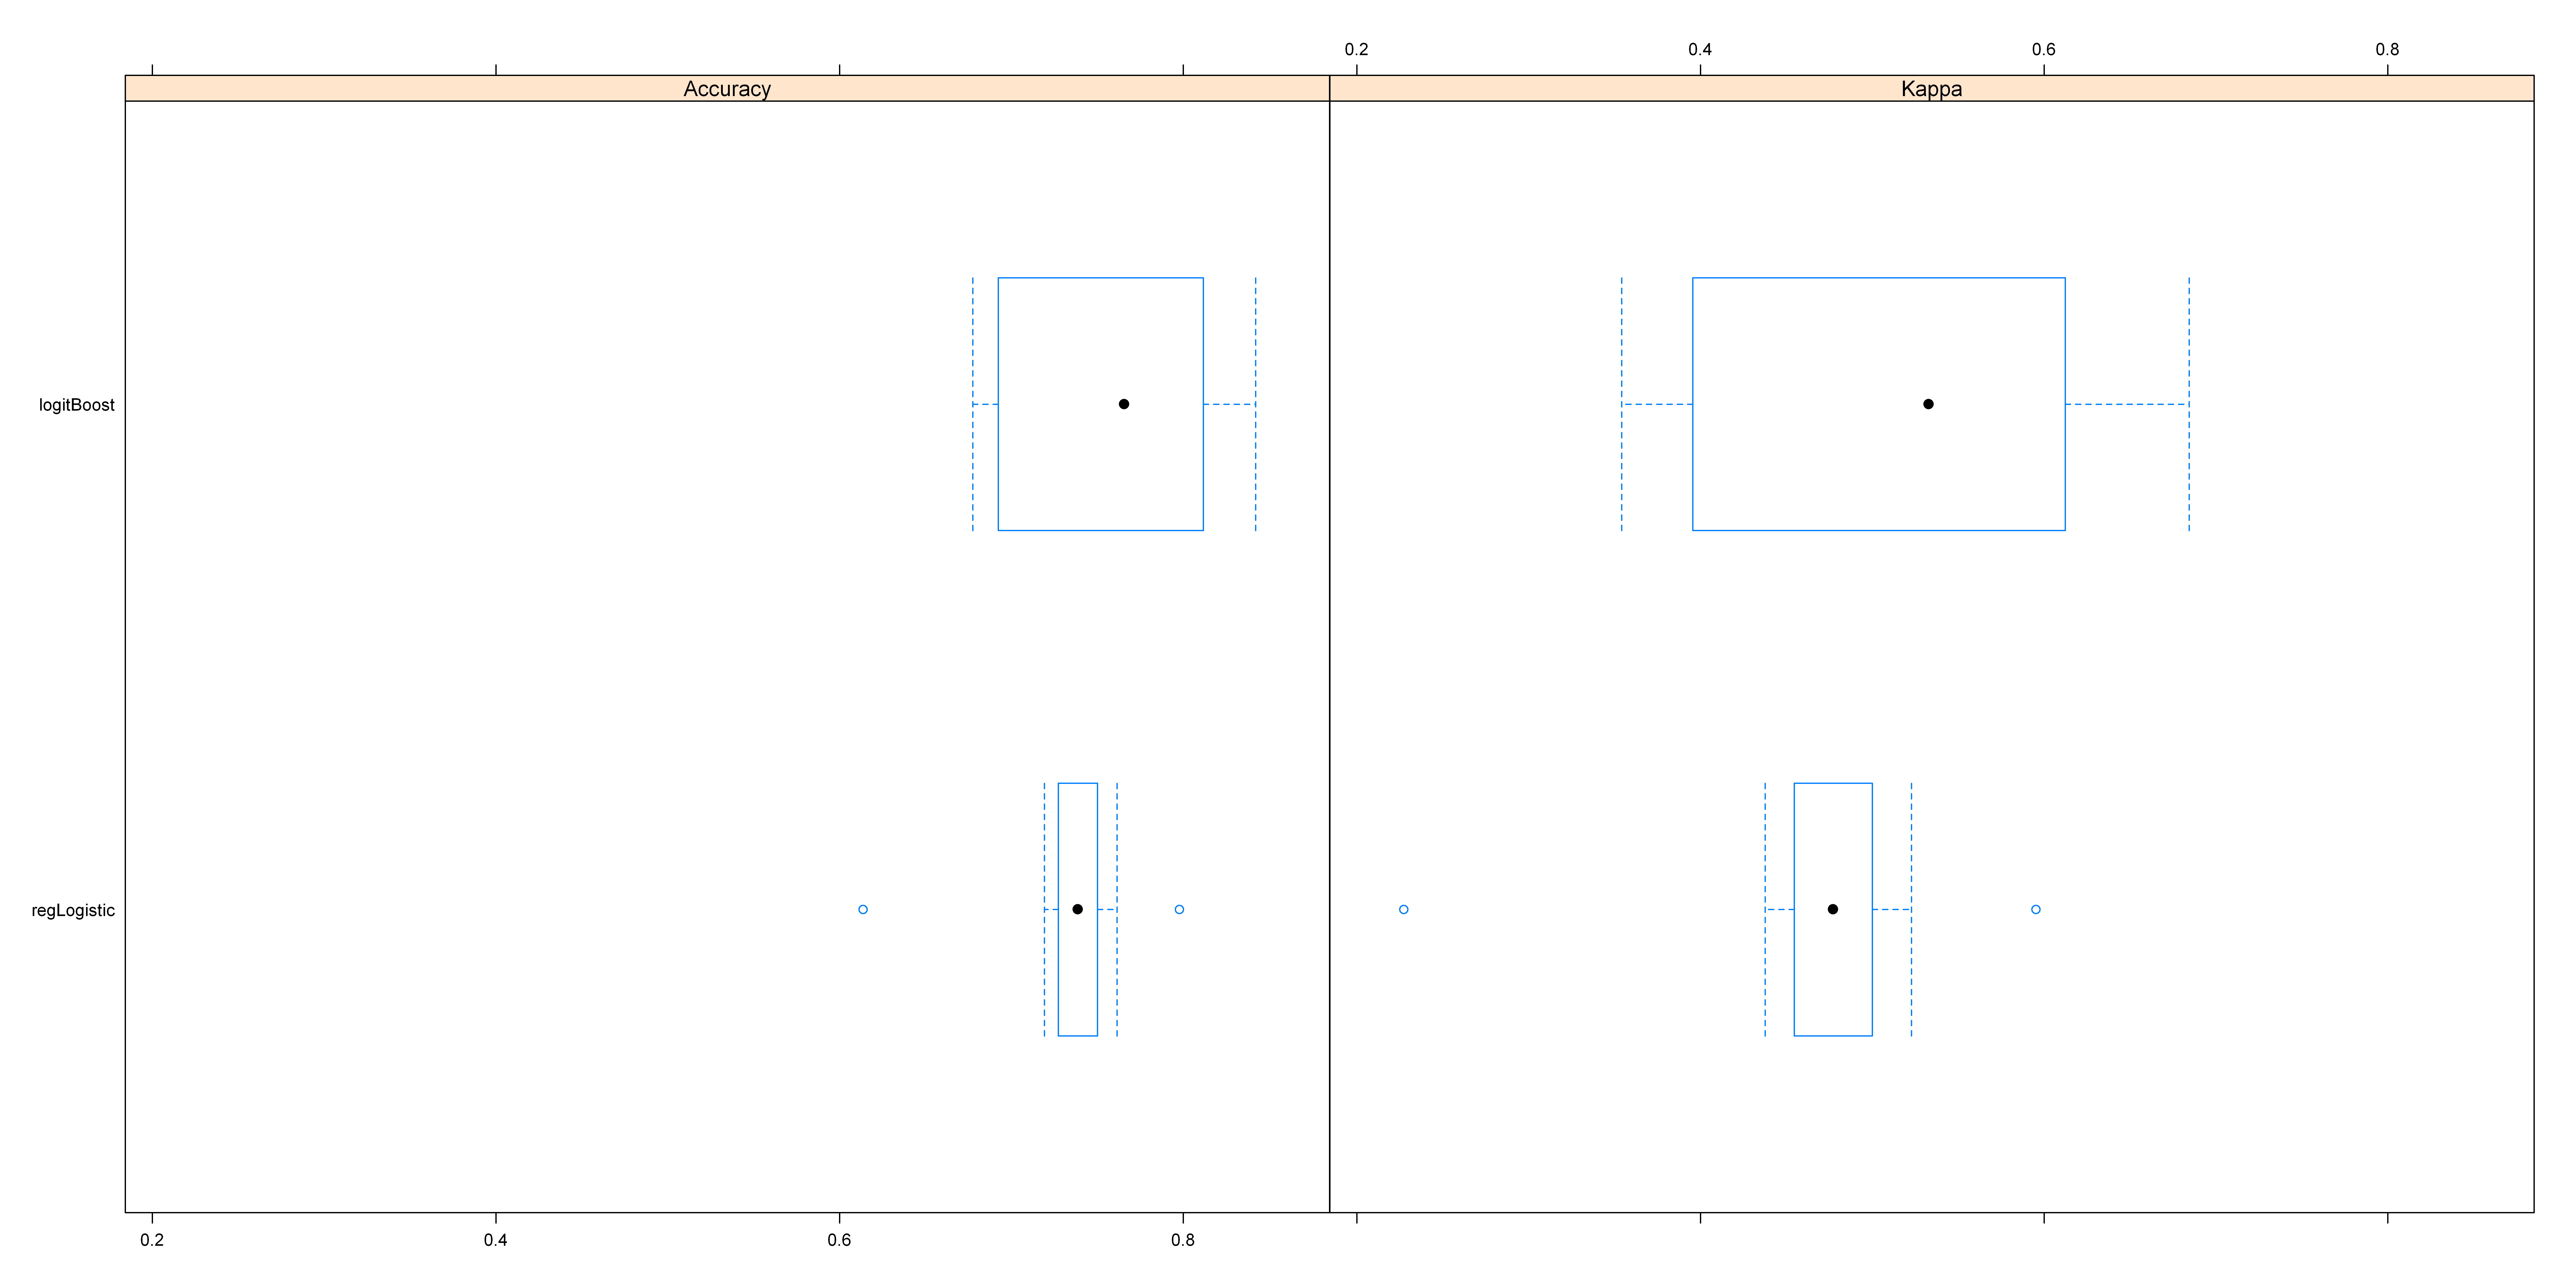

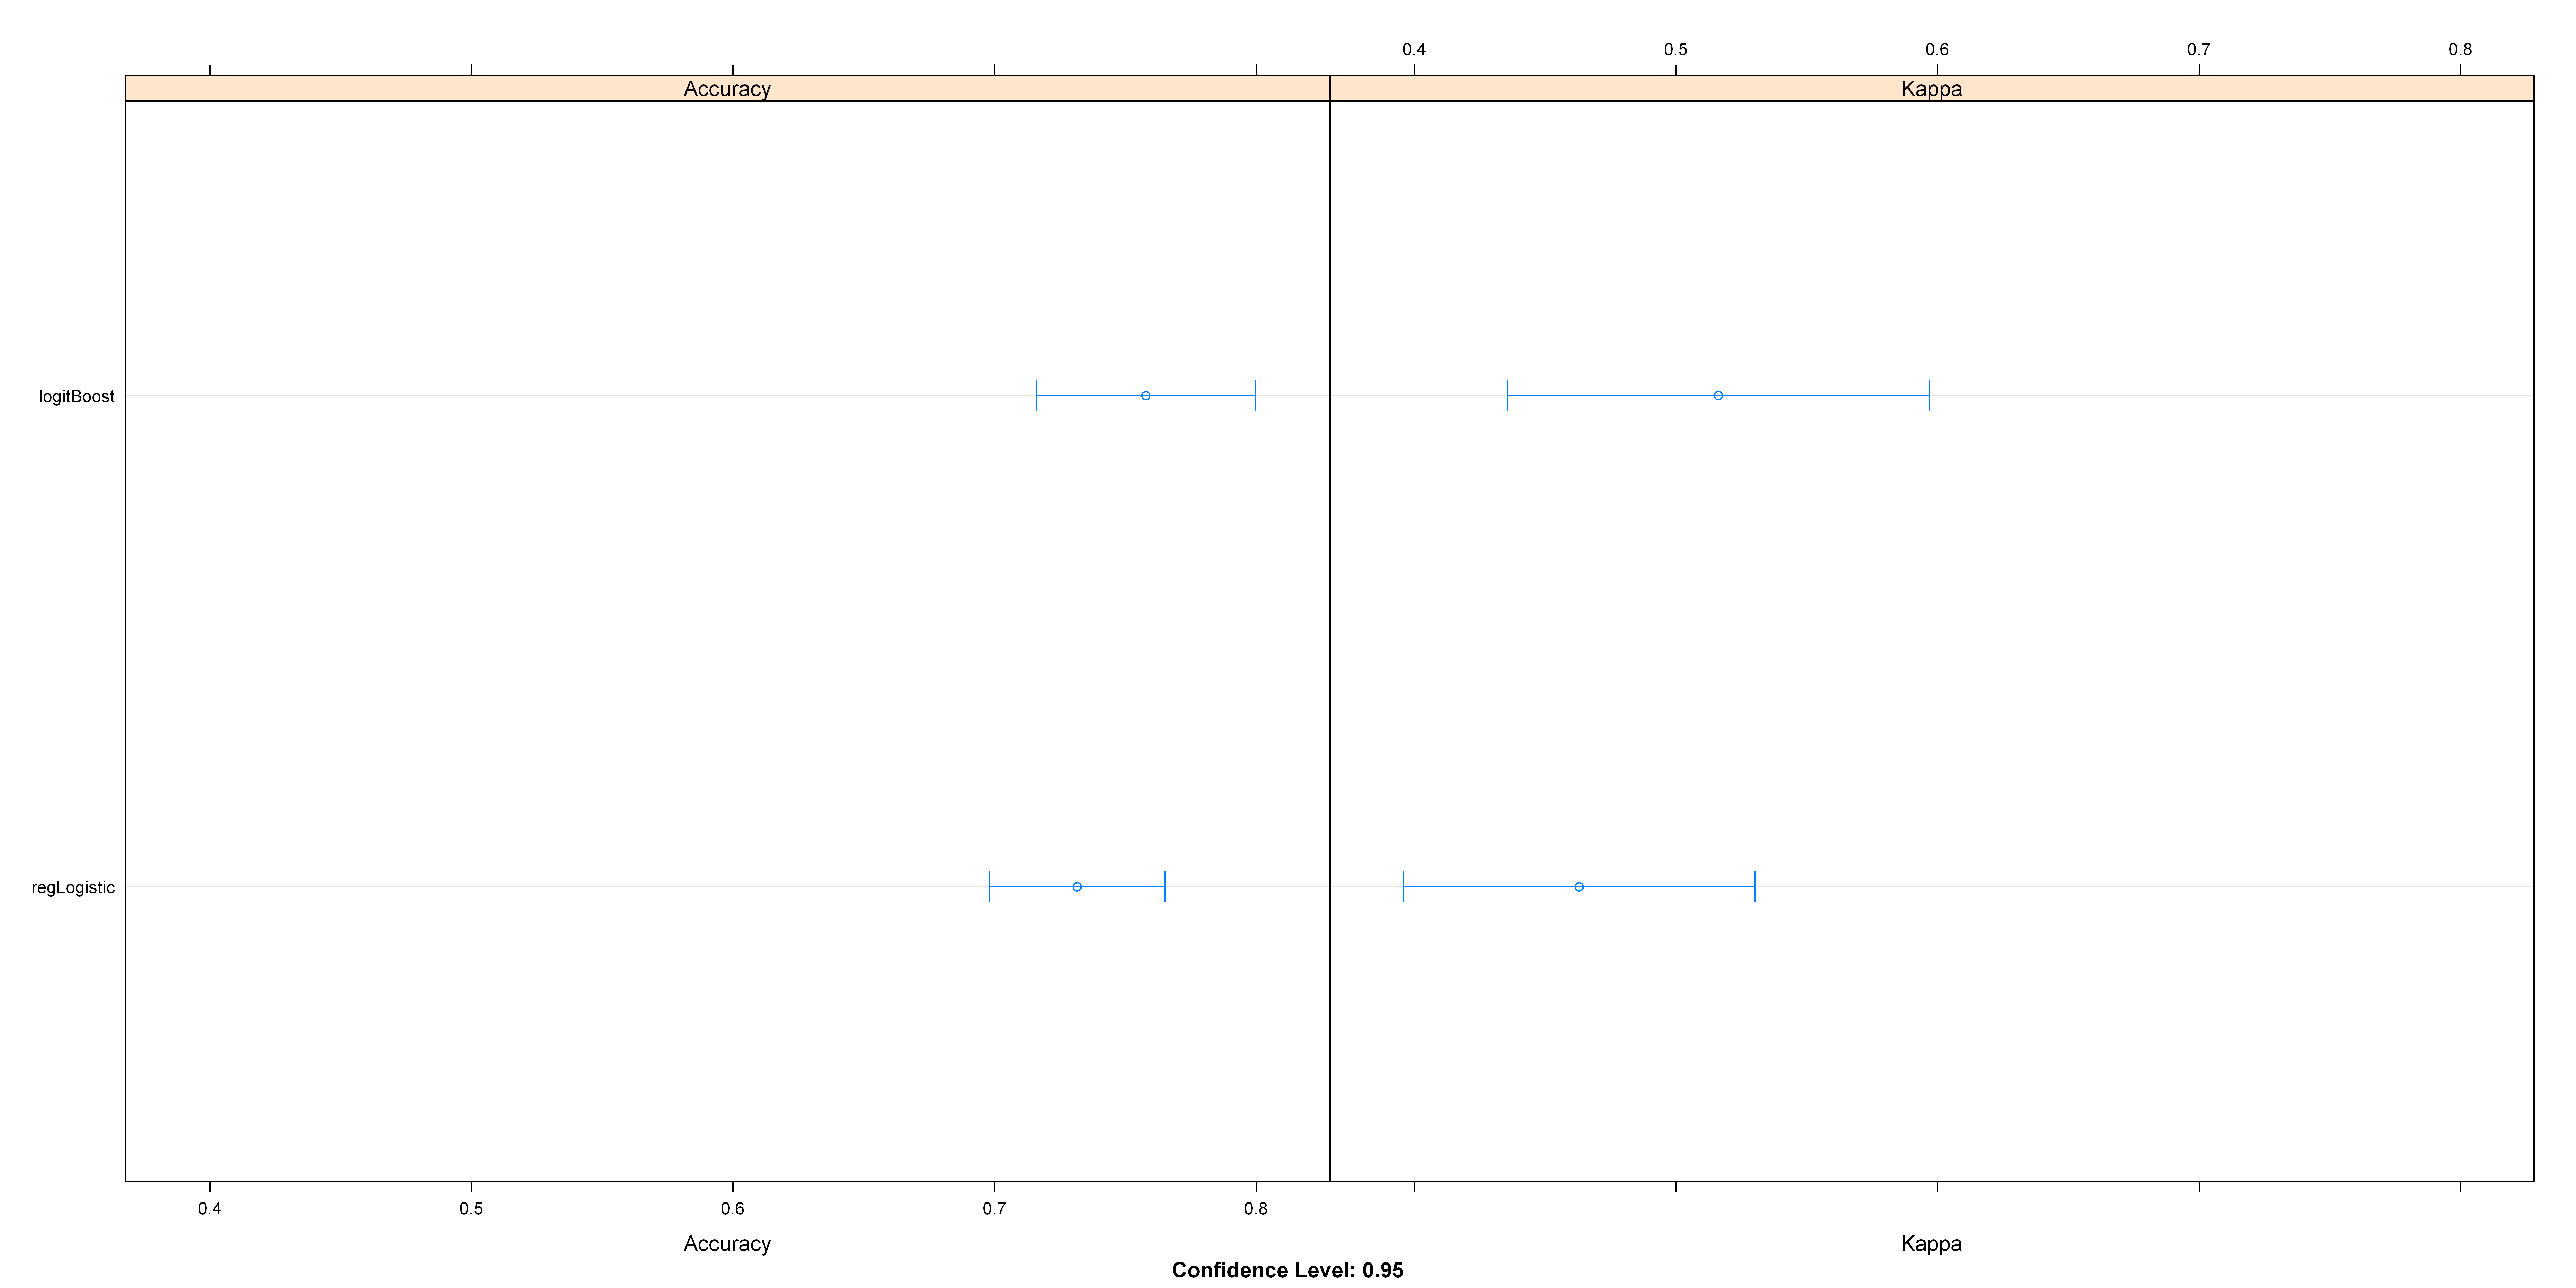

In [82]:
# collect resamples
results <- resamples(list(logitBoost=model_logitBoost,  regLogistic=model_regLogistic))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

## Prediction

In [83]:
pred_logitBoost <- predict(model_logitBoost,test)   # 53 acc
pred_logitBoost.prob <- predict(model_logitBoost,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_logitBoost) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      56      39
   NotFast   32     154
                                          
               Accuracy : 0.7473          
                 95% CI : (0.6923, 0.7971)
    No Information Rate : 0.6868          
    P-Value [Acc > NIR] : 0.0156          
                                          
                  Kappa : 0.4251          
                                          
 Mcnemar's Test P-Value : 0.4764          
                                          
            Sensitivity : 0.6364          
            Specificity : 0.7979          
         Pos Pred Value : 0.5895          
         Neg Pred Value : 0.8280          
             Prevalence : 0.3132          
         Detection Rate : 0.1993          
   Detection Prevalence : 0.3381          
      Balanced Accuracy : 0.7171          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.6363636            0.7979275            0.5894737 
      Neg Pred Value            Precision               Recall 
           0.8279570            0.5894737            0.6363636 
                  F1           Prevalence       Detection Rate 
           0.6120219            0.3131673            0.1992883 
Detection Prevalence    Balanced Accuracy 
           0.3380783            0.7171455

In [84]:
pred_regLogistic <- predict(model_regLogistic,test)  
pred_regLogistic.prob <- predict(model_regLogistic,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_regLogistic) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      78      49
   NotFast   68     184
                                          
               Accuracy : 0.6913          
                 95% CI : (0.6421, 0.7375)
    No Information Rate : 0.6148          
    P-Value [Acc > NIR] : 0.001153        
                                          
                  Kappa : 0.332           
                                          
 Mcnemar's Test P-Value : 0.096092        
                                          
            Sensitivity : 0.5342          
            Specificity : 0.7897          
         Pos Pred Value : 0.6142          
         Neg Pred Value : 0.7302          
             Prevalence : 0.3852          
         Detection Rate : 0.2058          
   Detection Prevalence : 0.3351          
      Balanced Accuracy : 0.6620          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.5342466            0.7896996            0.6141732 
      Neg Pred Value            Precision               Recall 
           0.7301587            0.6141732            0.5342466 
                  F1           Prevalence       Detection Rate 
           0.5714286            0.3852243            0.2058047 
Detection Prevalence    Balanced Accuracy 
           0.3350923            0.6619731

direction: in which direction to make the comparison? “auto” (default for univariate curves): automatically define in which group the median is higher and take the direction accordingly. Not available for multivariate curves. “>” (default for multivariate curves): if the predictor values for the control group are higher than the values of the case group (controls > t >= cases). “<”: if the predictor values for the control group are lower or equal than the values of the case group (controls < t <= cases).

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



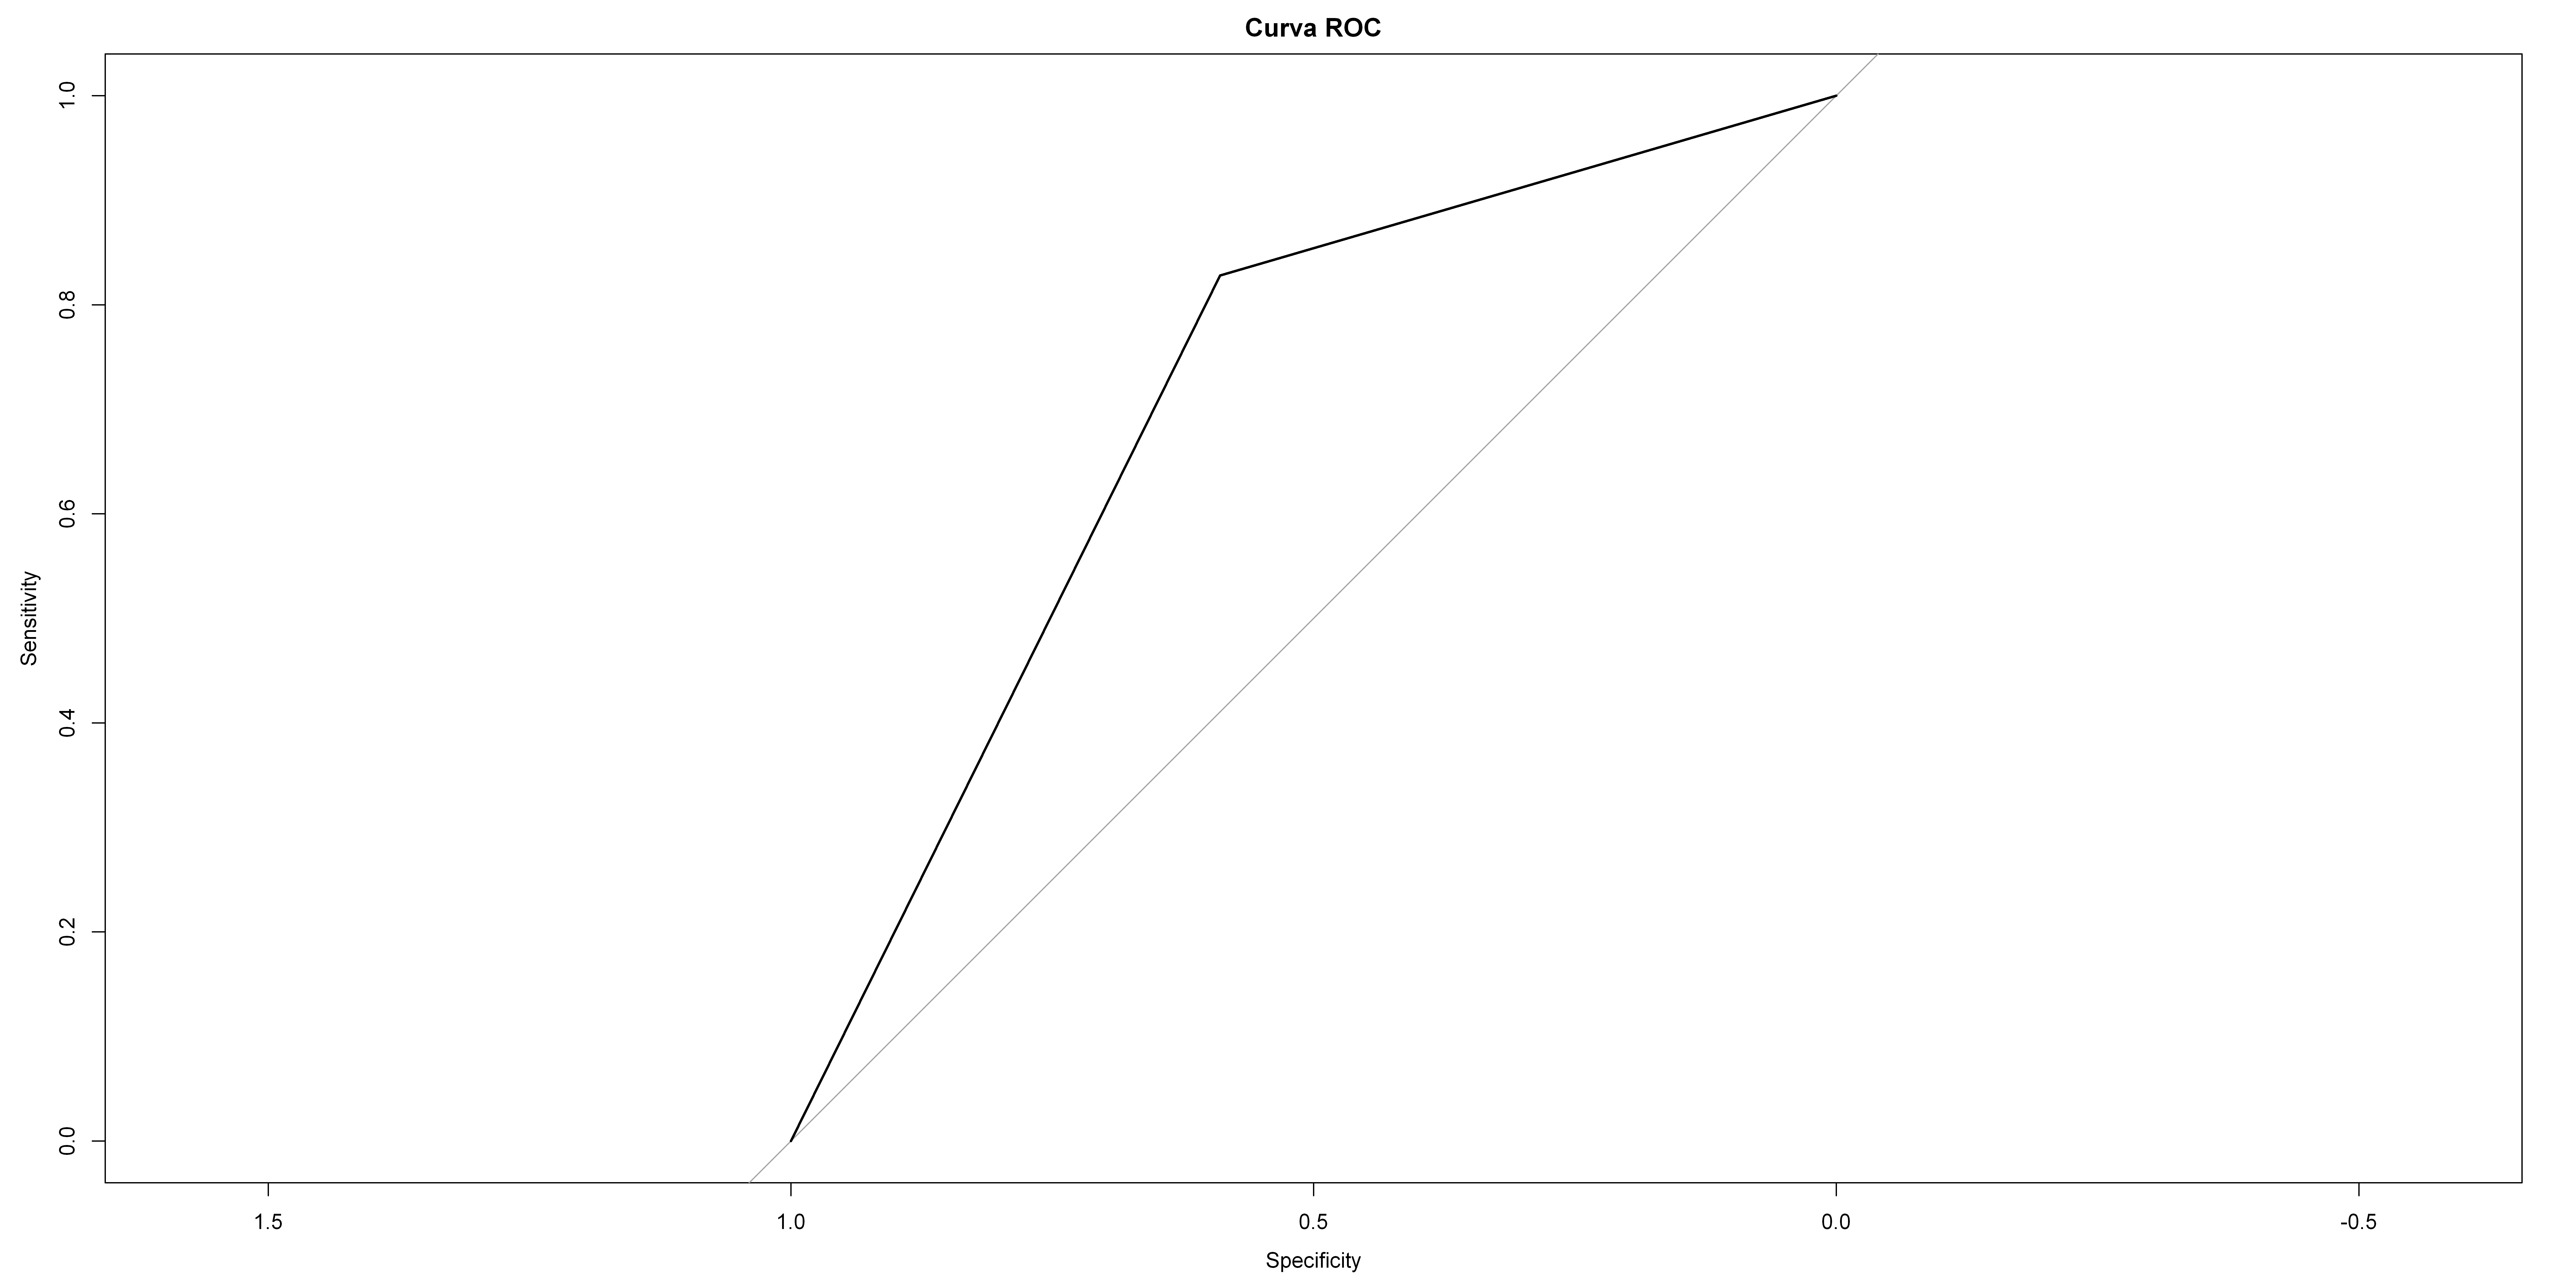

In [85]:
roc_obj <- roc(TestClasses, as.numeric(pred_logitBoost))
plot(roc_obj, main="Curva ROC")

In [86]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_logitBoost))

Data: as.numeric(pred_logitBoost) in 95 controls (TestClasses fast) < 186 cases (TestClasses NotFast).
Area under the curve: 0.7087

In [87]:
pred_logitBoost.prob

fast,NotFast
0.99752738,0.002472623
0.01798621,0.982013790
0.11920292,0.880797078
0.88079708,0.119202922
0.01798621,0.982013790
0.11920292,0.880797078
0.50000000,0.500000000
0.11920292,0.880797078
0.50000000,0.500000000
0.50000000,0.500000000


# Regressione logistica con variabili boruta

In [88]:
df_boruta <- subset(df, select=c(centreCode, degenzaPreTra, presentRefractAscites, nutritStatus, albumInfusOver7Days,
                                 ratioPaO2FiO2, platCountTranspl, albumina, surgeryDuration, IntraoperativTransfected,
                                 plasmaFresco, plasmaPools, CRIOprecipitated, CristalloidiComp, Albumina50Comp,
                                 noradrenalineEndSurger, intermedLactates, syndromeReperfus, abdomOpenEndSurg,
                                 organDonorDrawalSodiemia, realMELDNa, comorbidities_none_RIC, new_admWard, EPScum,deg_cat))

In [89]:



sample <- sample.split(df_boruta$deg_cat, SplitRatio = 0.7)
train  <- subset(df_boruta, sample == TRUE)
test   <- subset(df_boruta, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [90]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


   fast NotFast 
    441     442 

In [91]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [92]:
#Regularized Logistic Regression
model_regLogistic <- train(deg_cat ~ . , data = train,
               method = "regLogistic",
               trControl = ctrl)  

+ Fold01.Rep1: cost= 0.07494, loss=L1, epsilon=1 
- Fold01.Rep1: cost= 0.07494, loss=L1, epsilon=1 
+ Fold01.Rep1: cost=18.32892, loss=L1, epsilon=1 
- Fold01.Rep1: cost=18.32892, loss=L1, epsilon=1 
+ Fold01.Rep1: cost= 0.13698, loss=L2_dual, epsilon=1 
- Fold01.Rep1: cost= 0.13698, loss=L2_dual, epsilon=1 
+ Fold02.Rep1: cost= 0.07494, loss=L1, epsilon=1 
- Fold02.Rep1: cost= 0.07494, loss=L1, epsilon=1 
+ Fold02.Rep1: cost=18.32892, loss=L1, epsilon=1 
- Fold02.Rep1: cost=18.32892, loss=L1, epsilon=1 
+ Fold02.Rep1: cost= 0.13698, loss=L2_dual, epsilon=1 
- Fold02.Rep1: cost= 0.13698, loss=L2_dual, epsilon=1 
+ Fold03.Rep1: cost= 0.07494, loss=L1, epsilon=1 
- Fold03.Rep1: cost= 0.07494, loss=L1, epsilon=1 
+ Fold03.Rep1: cost=18.32892, loss=L1, epsilon=1 
- Fold03.Rep1: cost=18.32892, loss=L1, epsilon=1 
+ Fold03.Rep1: cost= 0.13698, loss=L2_dual, epsilon=1 
- Fold03.Rep1: cost= 0.13698, loss=L2_dual, epsilon=1 
+ Fold04.Rep1: cost= 0.07494, loss=L1, epsilon=1 
- Fold04.Rep1: cost=

In [93]:
#Boosted Logistic Regression
model_logitBoost <- train(deg_cat ~ . , data = train,
               method = "LogitBoost", trControl = ctrl) 


+ Fold01.Rep1: nIter=95 
- Fold01.Rep1: nIter=95 
+ Fold02.Rep1: nIter=95 
- Fold02.Rep1: nIter=95 
+ Fold03.Rep1: nIter=95 
- Fold03.Rep1: nIter=95 
+ Fold04.Rep1: nIter=95 
- Fold04.Rep1: nIter=95 
+ Fold05.Rep1: nIter=95 
- Fold05.Rep1: nIter=95 
+ Fold06.Rep1: nIter=95 
- Fold06.Rep1: nIter=95 
+ Fold07.Rep1: nIter=95 
- Fold07.Rep1: nIter=95 
+ Fold08.Rep1: nIter=95 
- Fold08.Rep1: nIter=95 
+ Fold09.Rep1: nIter=95 
- Fold09.Rep1: nIter=95 
+ Fold10.Rep1: nIter=95 
- Fold10.Rep1: nIter=95 
Aggregating results
Selecting tuning parameters
Fitting nIter = 48 on full training set


Regularized Logistic Regression 

883 samples
 24 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 795, 794, 794, 795, 795, 795, ... 
Resampling results across tuning parameters:

  cost         loss     Accuracy   Kappa    
   0.07493558  L1       0.7167773  0.4336849
   0.13697900  L2_dual  0.7416879  0.4833875
  18.32892152  L1       0.7314607  0.4629772

Tuning parameter 'epsilon' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were cost = 0.136979, loss = L2_dual
 and epsilon = 1.


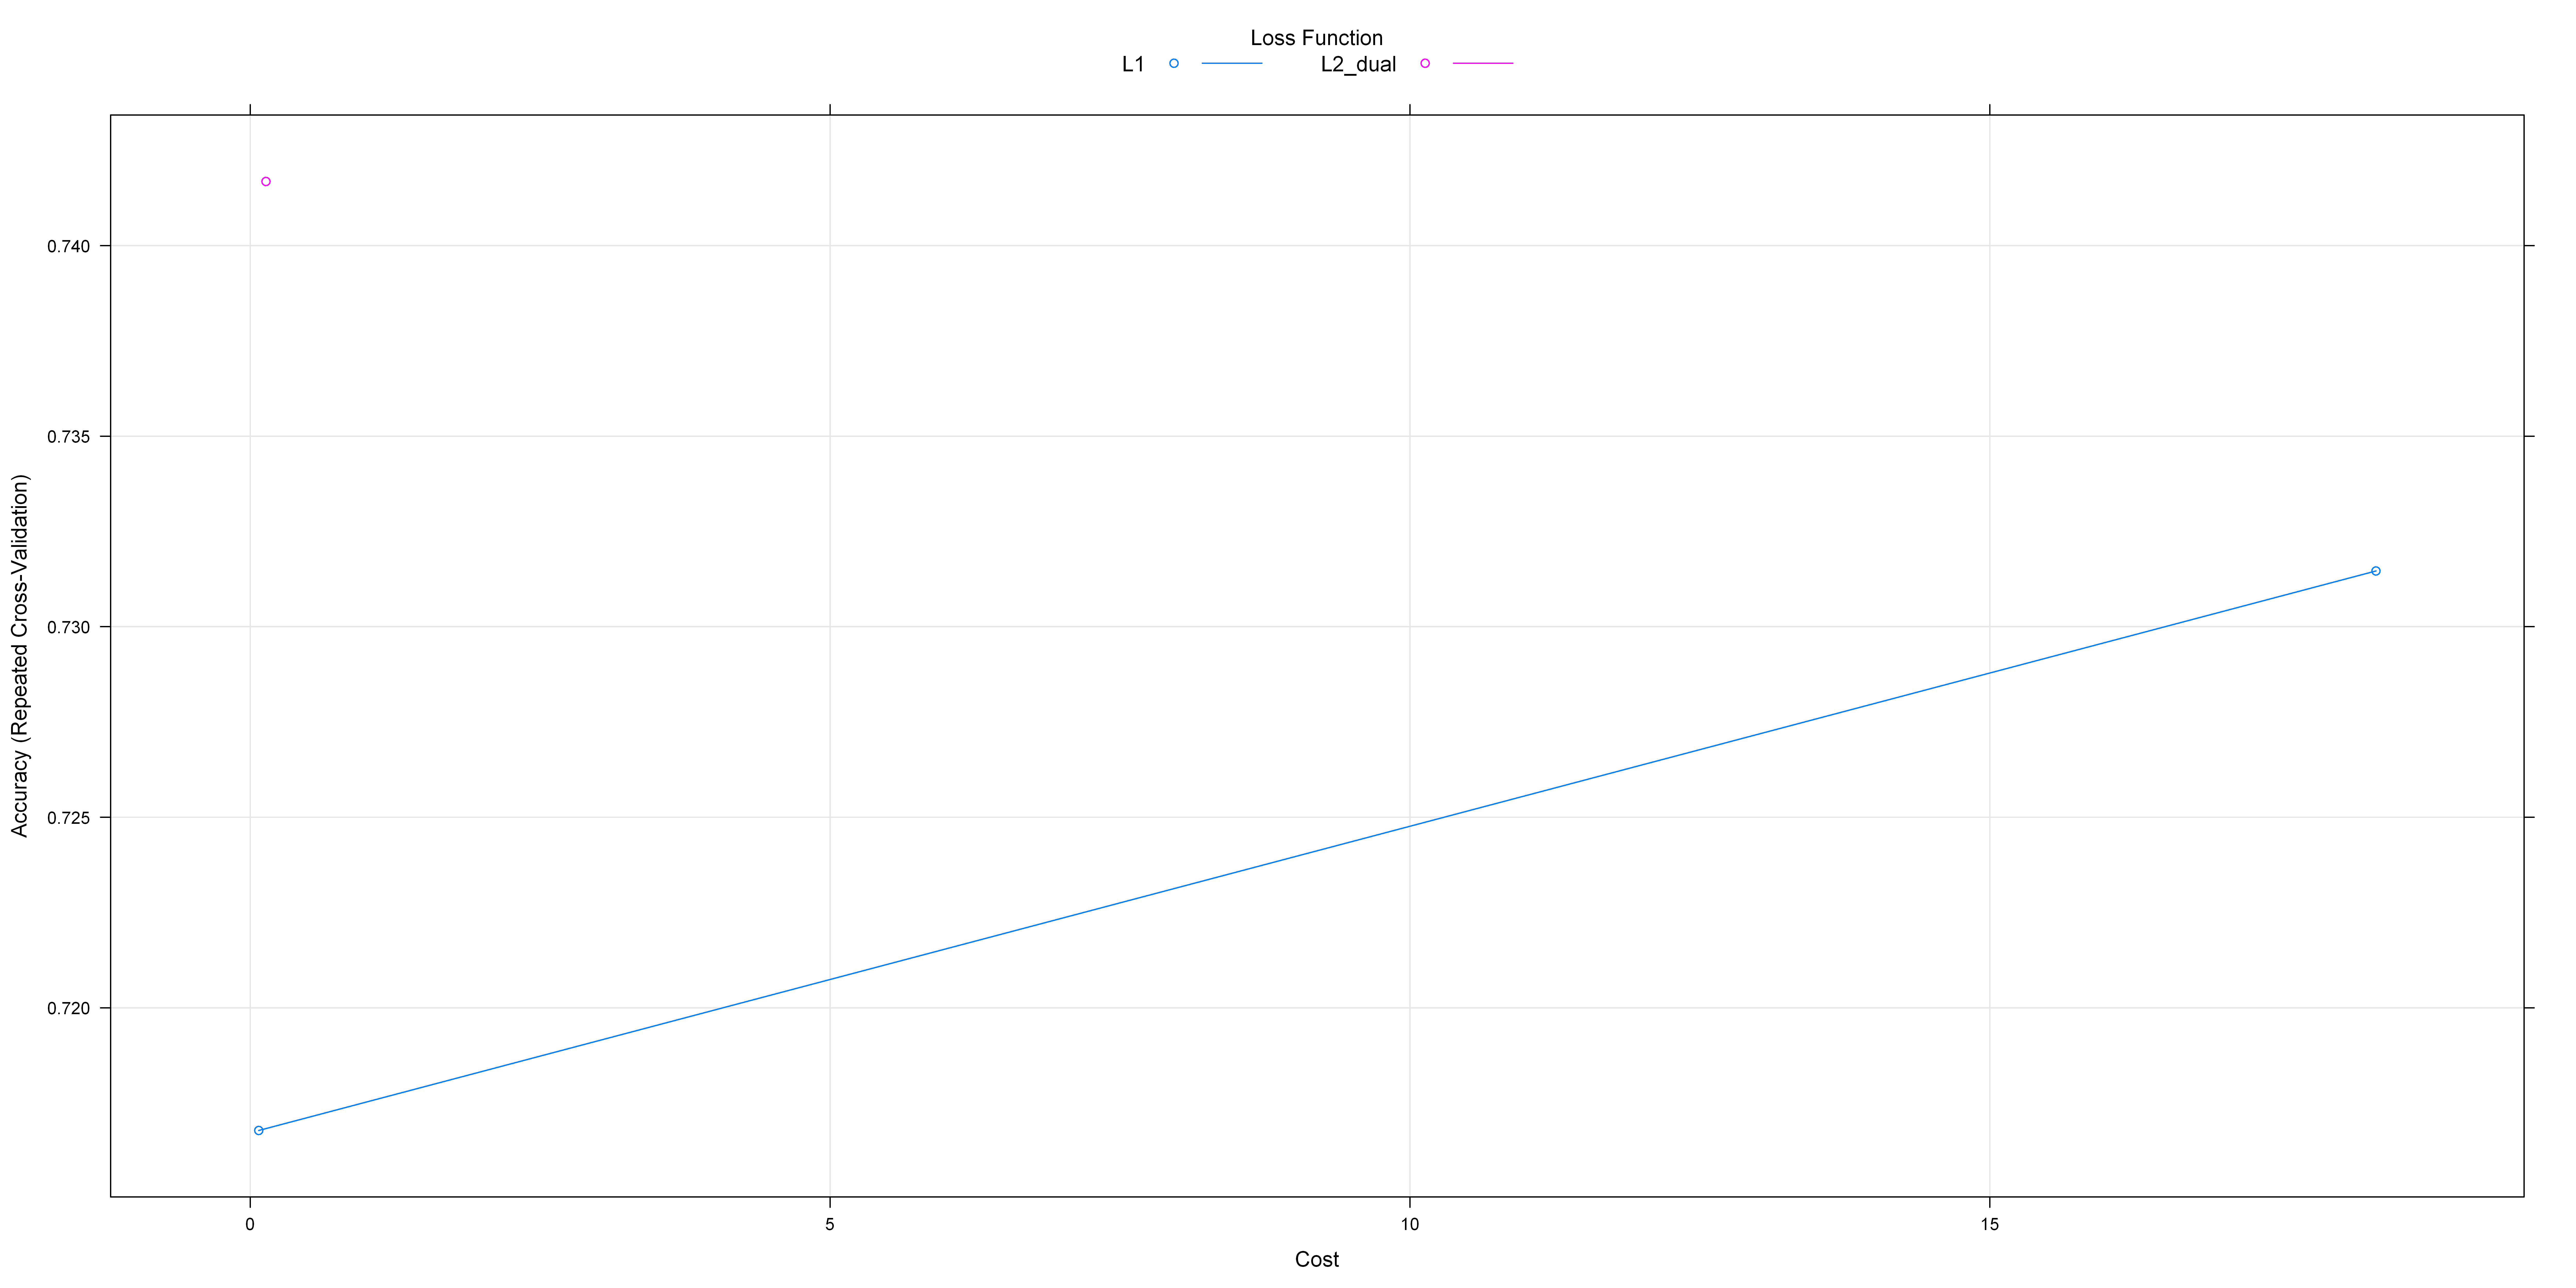

In [94]:
print(model_regLogistic)
plot(model_regLogistic)

Boosted Logistic Regression 

883 samples
 24 predictor
  2 classes: 'fast', 'NotFast' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 794, 794, 795, 795, 795, 794, ... 
Resampling results across tuning parameters:

  nIter  Accuracy   Kappa    
  48     0.7444627  0.4854522
  62     0.7289222  0.4567408
  95     0.6751788  0.3505520

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was nIter = 48.


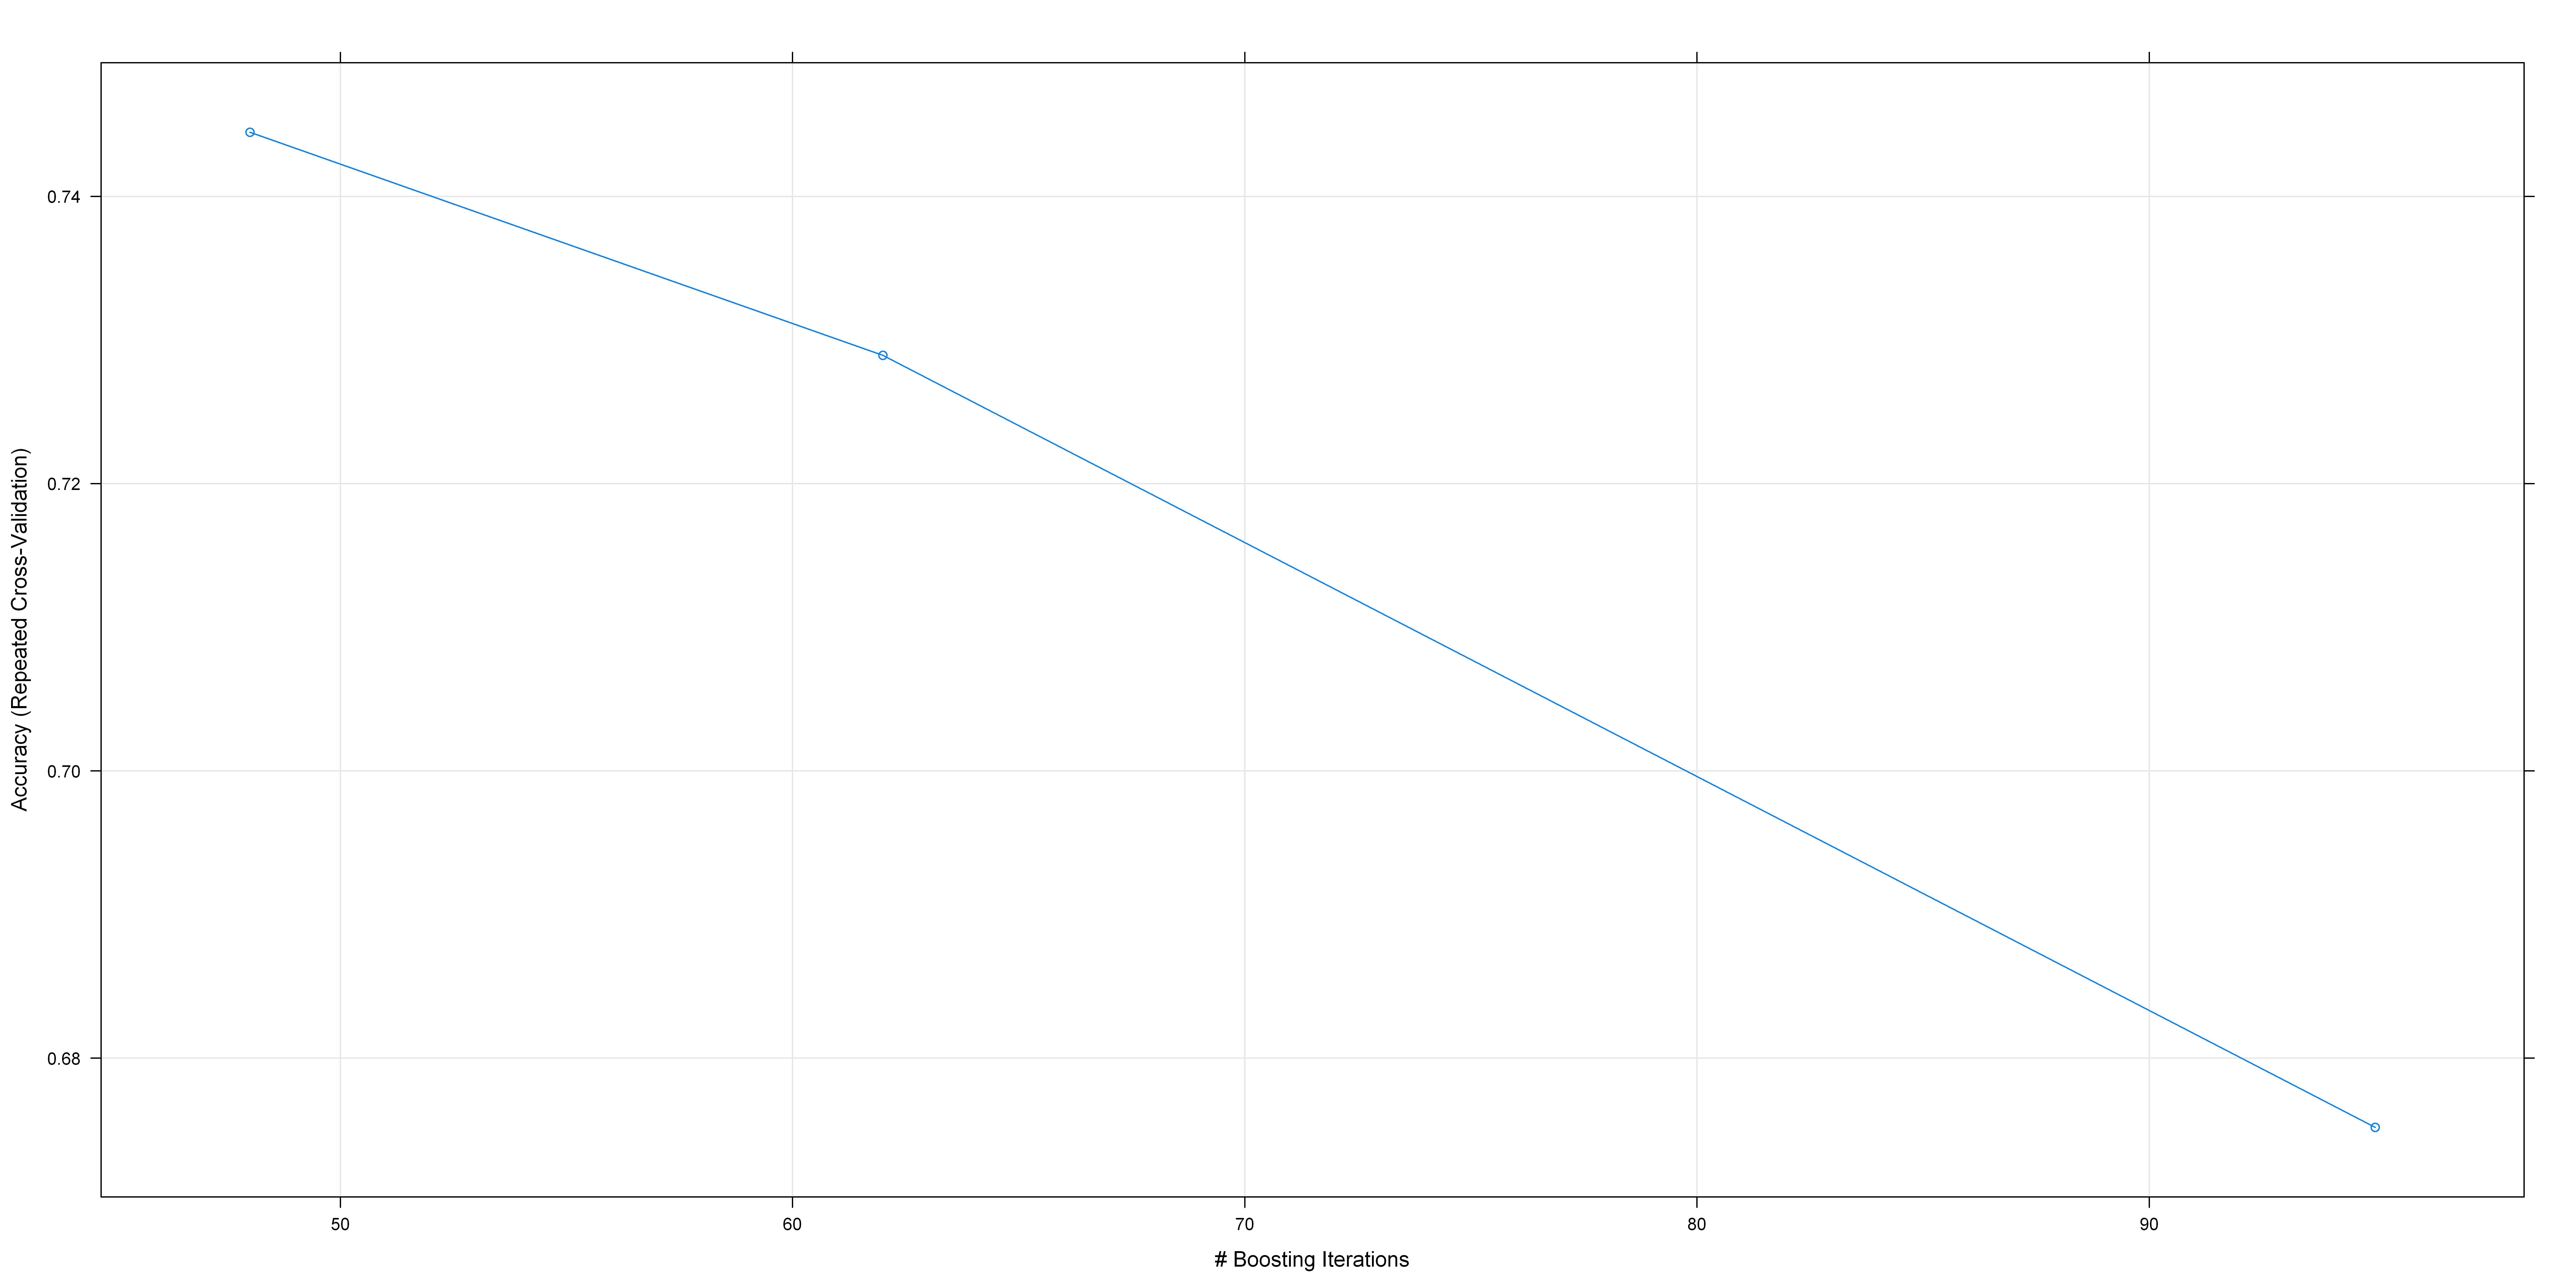

In [95]:
print(model_logitBoost)
plot(model_logitBoost)


Call:
summary.resamples(object = results)

Models: logitBoost, regLogistic 
Number of resamples: 10 

Accuracy 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.6567164 0.6929557 0.7496013 0.7444627 0.7843053 0.8387097    0
regLogistic 0.6363636 0.7053754 0.7386364 0.7416879 0.7886555 0.8181818    0

Kappa 
                 Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logitBoost  0.3017671 0.3827436 0.4971689 0.4854522 0.5658920 0.6774194    0
regLogistic 0.2727273 0.4107323 0.4772727 0.4833875 0.5772727 0.6363636    0


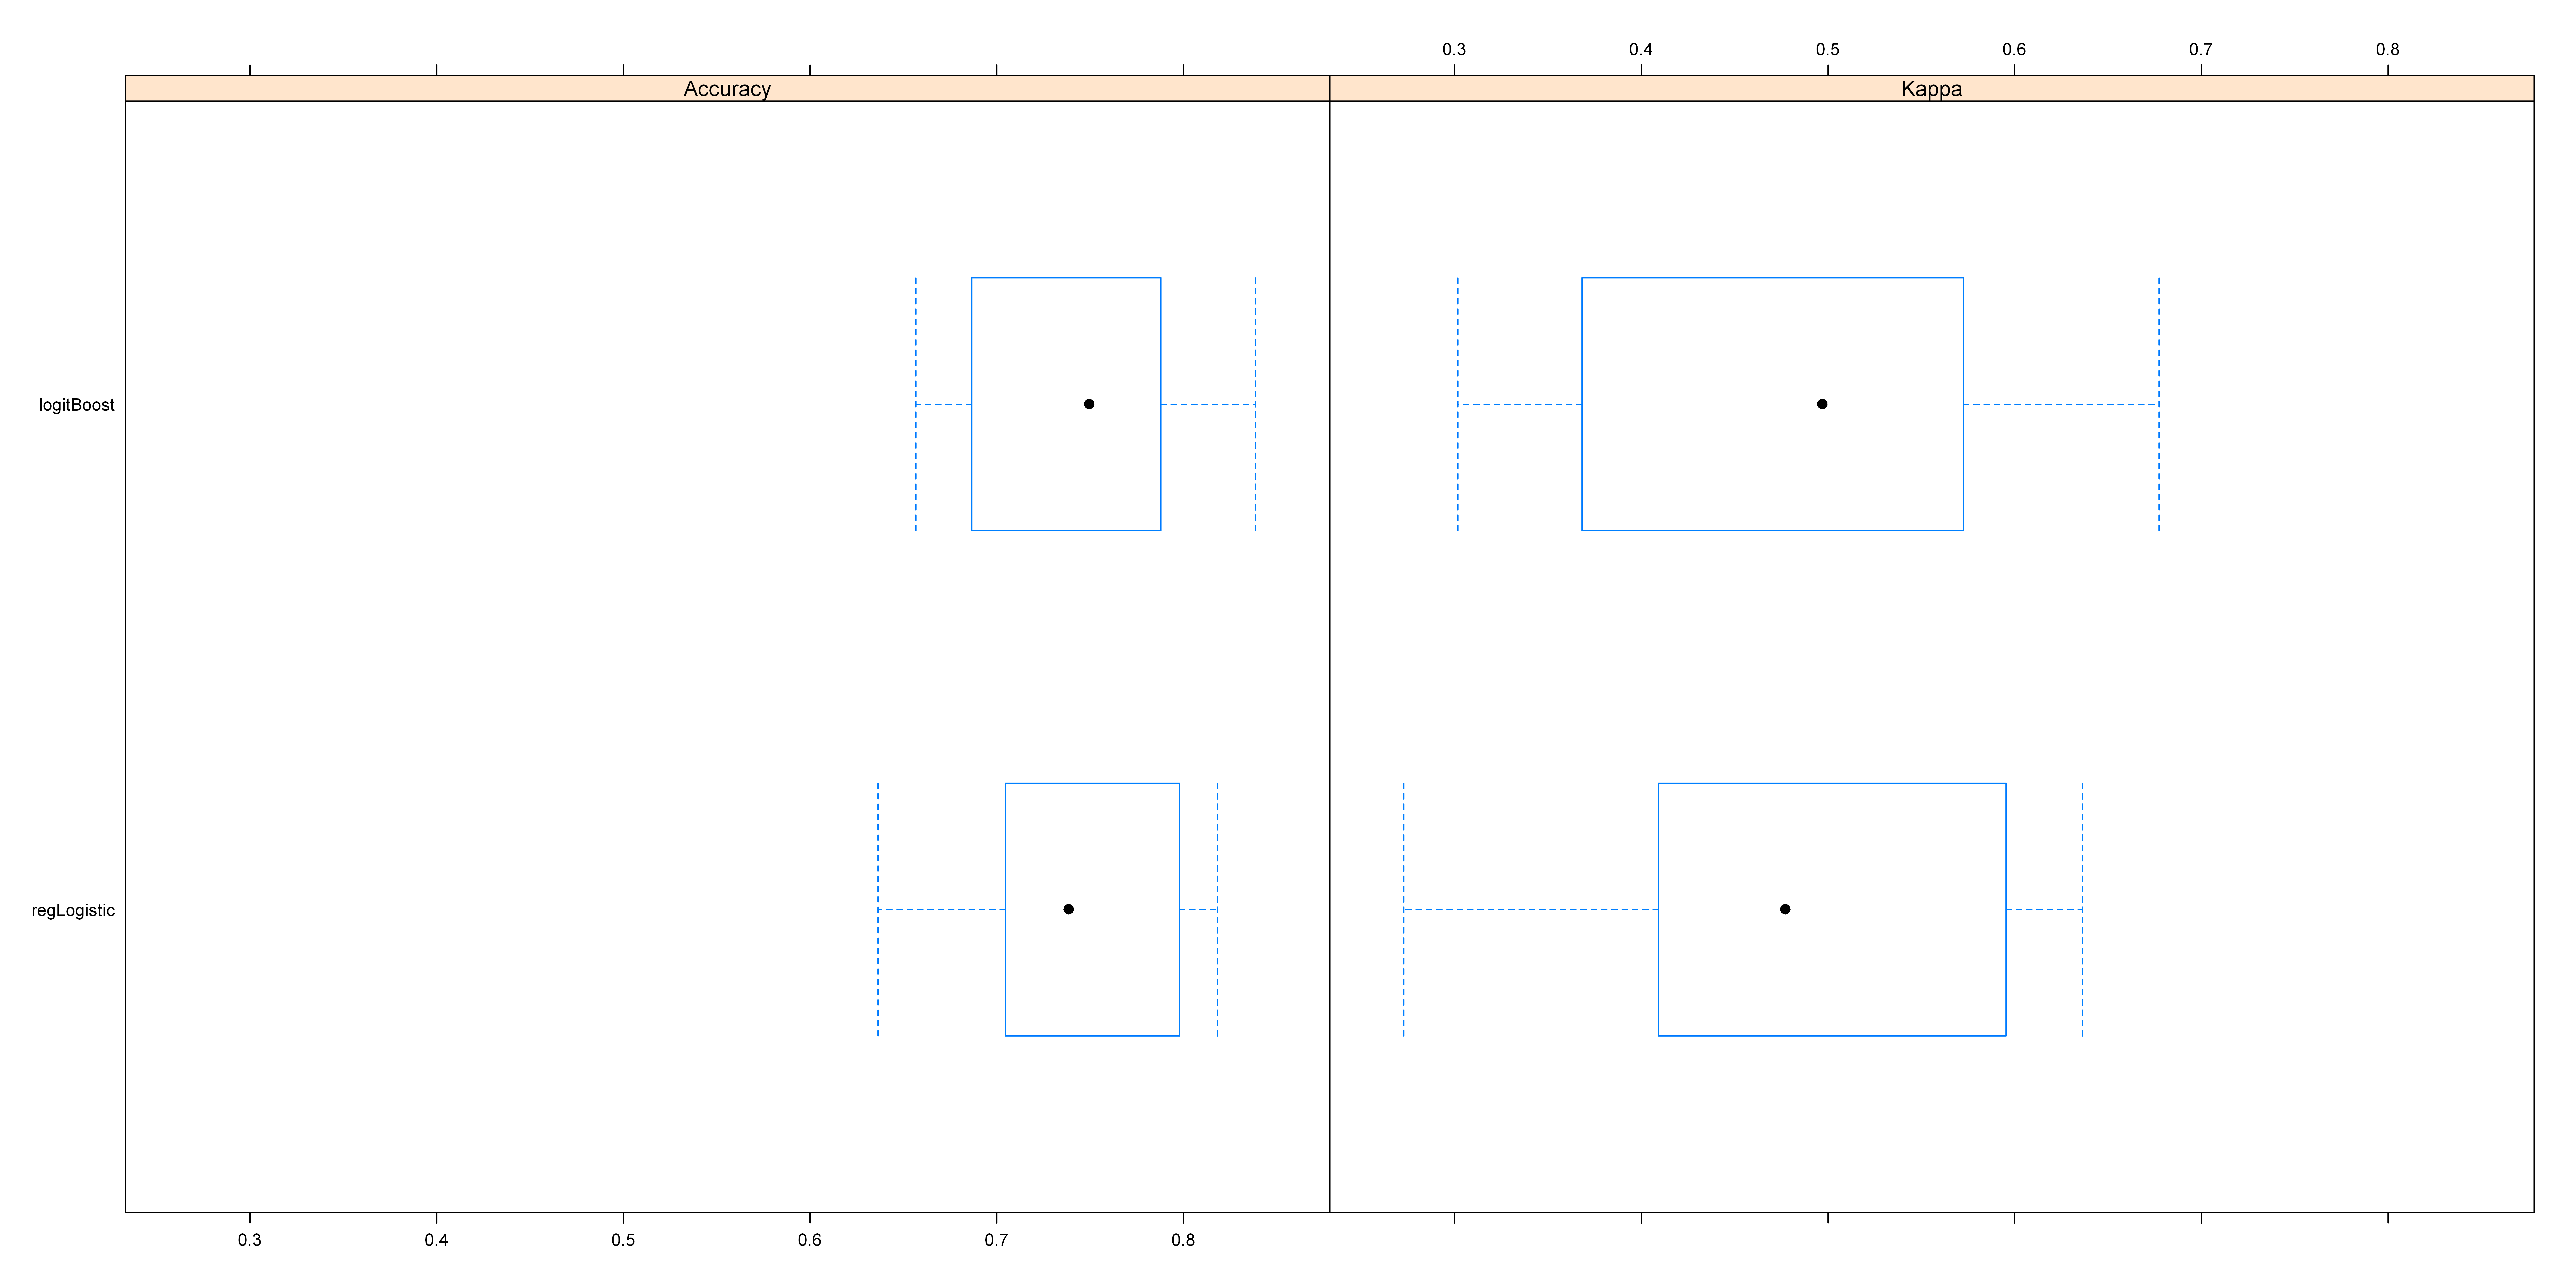

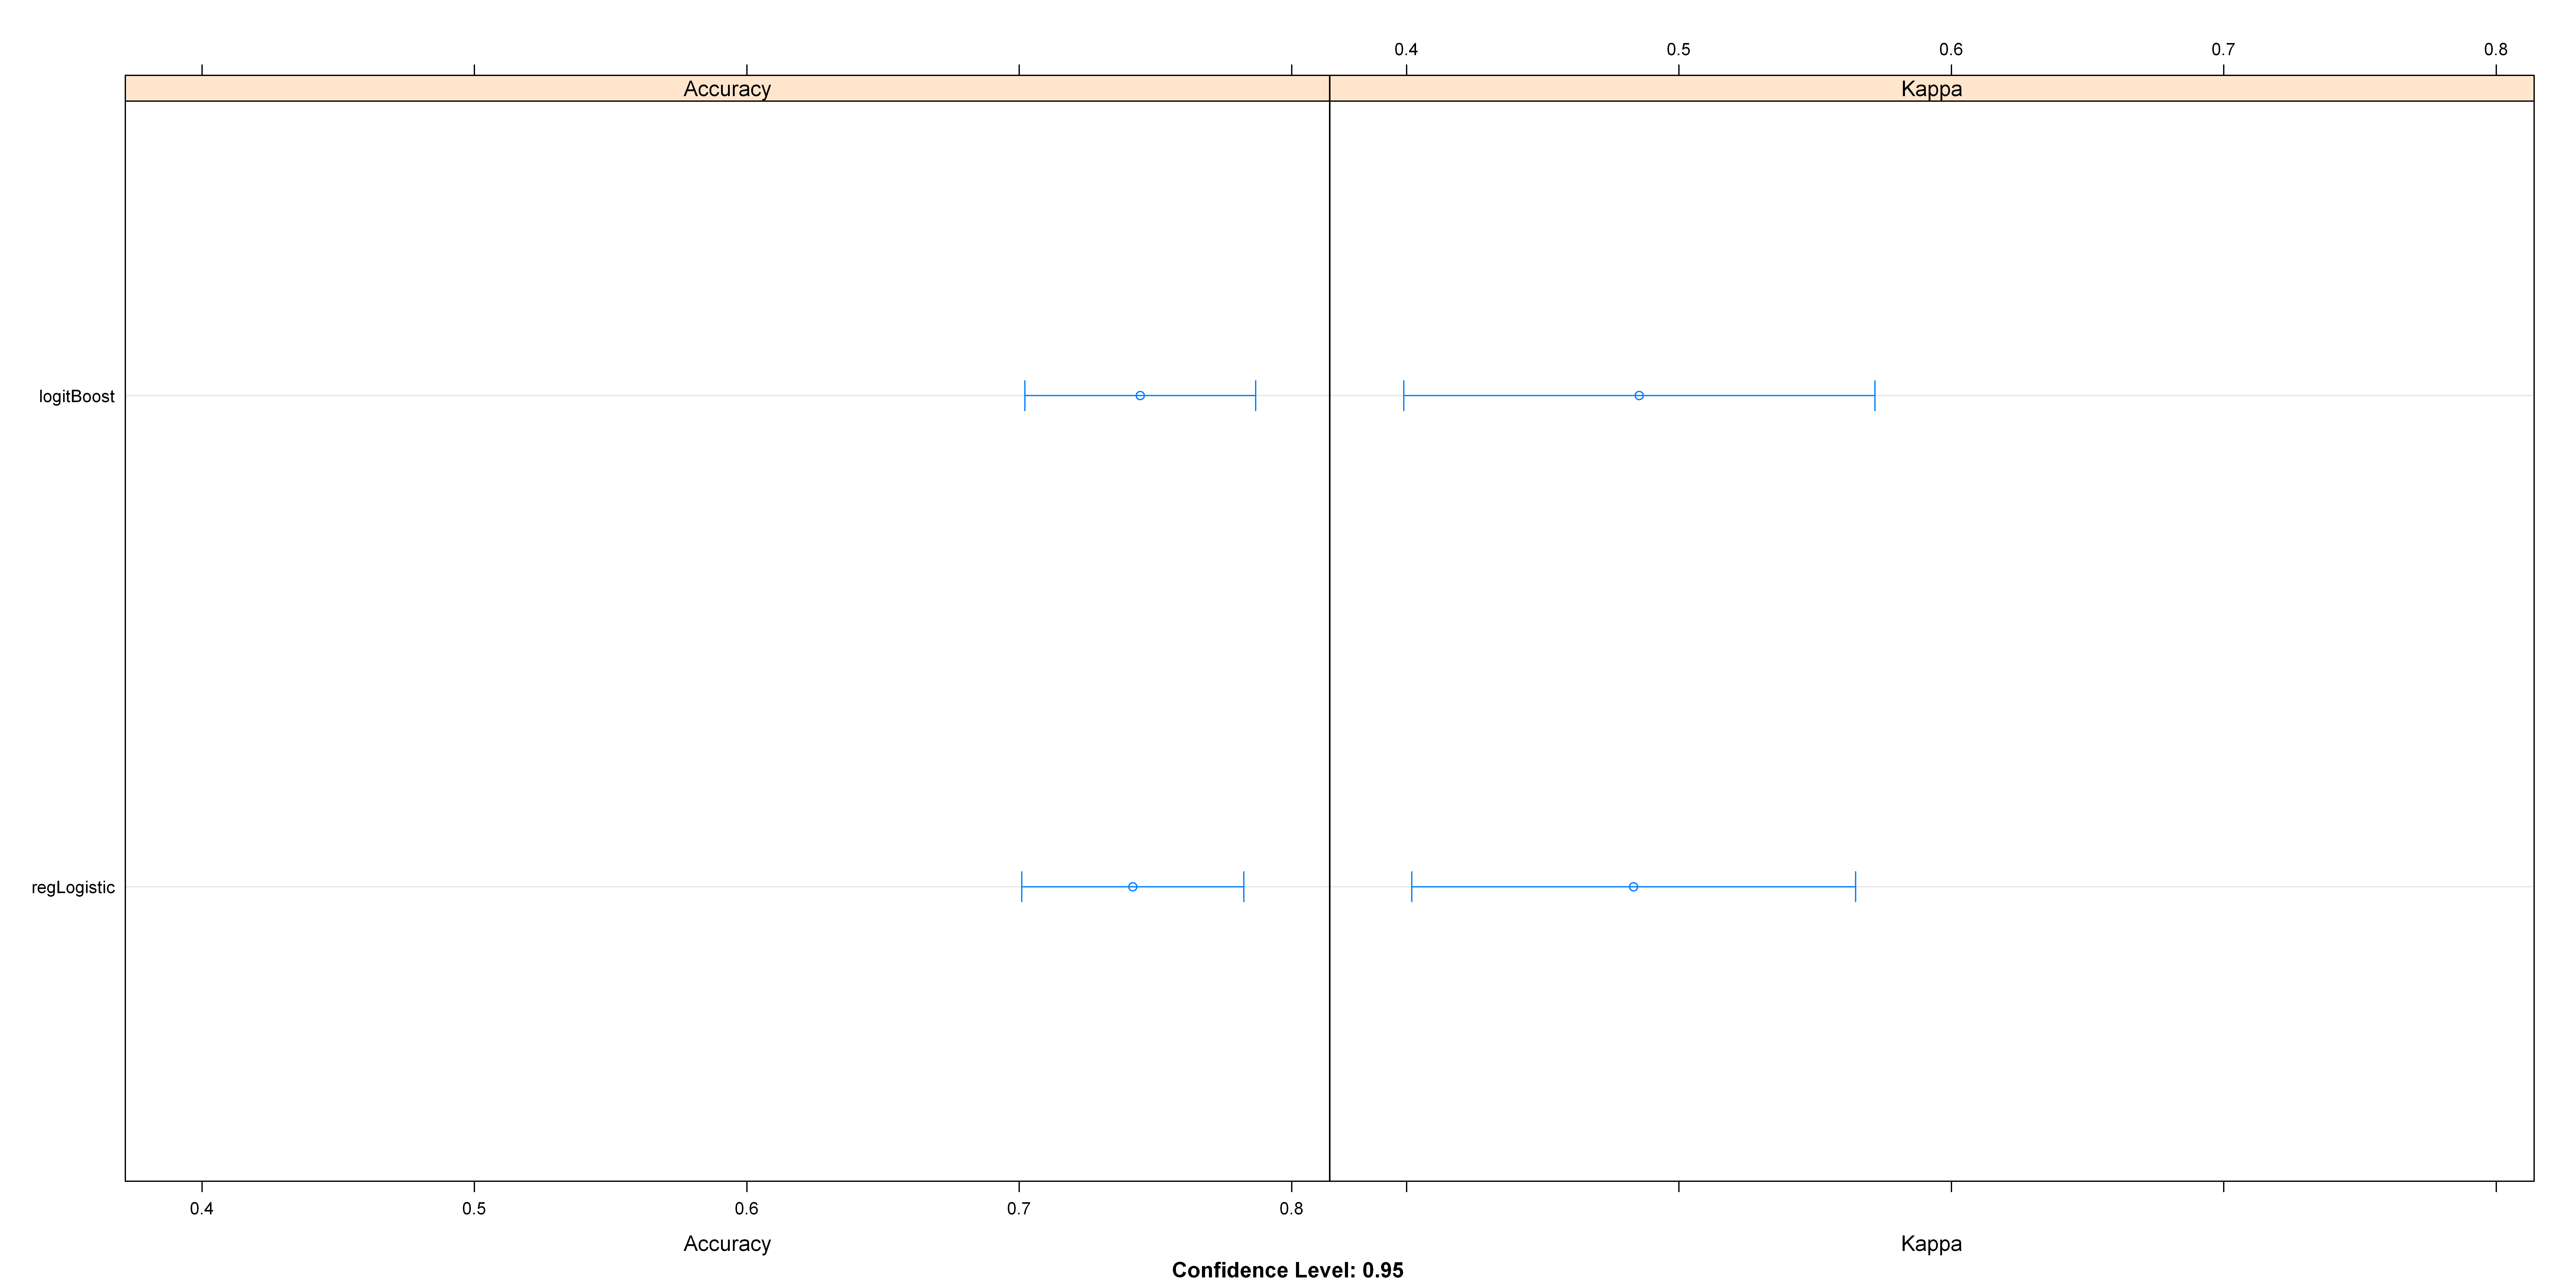

In [96]:
# collect resamples
results <- resamples(list(logitBoost=model_logitBoost,  regLogistic=model_regLogistic))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

In [97]:
pred_logitBoost <- predict(model_logitBoost,test)   
pred_logitBoost.prob <- predict(model_logitBoost,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_logitBoost) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      51      20
   NotFast   28     126
                                          
               Accuracy : 0.7867          
                 95% CI : (0.7273, 0.8383)
    No Information Rate : 0.6489          
    P-Value [Acc > NIR] : 4.862e-06       
                                          
                  Kappa : 0.5207          
                                          
 Mcnemar's Test P-Value : 0.3123          
                                          
            Sensitivity : 0.6456          
            Specificity : 0.8630          
         Pos Pred Value : 0.7183          
         Neg Pred Value : 0.8182          
             Prevalence : 0.3511          
         Detection Rate : 0.2267          
   Detection Prevalence : 0.3156          
      Balanced Accuracy : 0.7543          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.6455696            0.8630137            0.7183099 
      Neg Pred Value            Precision               Recall 
           0.8181818            0.7183099            0.6455696 
                  F1           Prevalence       Detection Rate 
           0.6800000            0.3511111            0.2266667 
Detection Prevalence    Balanced Accuracy 
           0.3155556            0.7542917

In [98]:
pred_regLogistic <- predict(model_regLogistic,test)   
pred_regLogistic.prob <- predict(model_regLogistic,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_regLogistic) 
result
result$byClass

Confusion Matrix and Statistics

          Reference
Prediction fast NotFast
   fast      92      35
   NotFast   67     185
                                          
               Accuracy : 0.7309          
                 95% CI : (0.6832, 0.7749)
    No Information Rate : 0.5805          
    P-Value [Acc > NIR] : 8.236e-10       
                                          
                  Kappa : 0.4316          
                                          
 Mcnemar's Test P-Value : 0.002144        
                                          
            Sensitivity : 0.5786          
            Specificity : 0.8409          
         Pos Pred Value : 0.7244          
         Neg Pred Value : 0.7341          
             Prevalence : 0.4195          
         Detection Rate : 0.2427          
   Detection Prevalence : 0.3351          
      Balanced Accuracy : 0.7098          
                                          
       'Positive' Class : fast            
               

Sensitivity          Specificity       Pos Pred Value 
           0.5786164            0.8409091            0.7244094 
      Neg Pred Value            Precision               Recall 
           0.7341270            0.7244094            0.5786164 
                  F1           Prevalence       Detection Rate 
           0.6433566            0.4195251            0.2427441 
Detection Prevalence    Balanced Accuracy 
           0.3350923            0.7097627

In [99]:
varImp(model_regLogistic)

ROC curve variable importance

  only 20 most important variables shown (out of 24)

                         Importance
realMELDNa                  100.000
IntraoperativTransfected     79.733
centreCode                   75.723
albumina                     62.062
plasmaPools                  60.213
ratioPaO2FiO2                58.174
surgeryDuration              57.179
noradrenalineEndSurger       55.098
presentRefractAscites        48.821
platCountTranspl             44.373
EPScum                       41.914
intermedLactates             38.749
degenzaPreTra                34.939
new_admWard                  30.032
syndromeReperfus             29.255
albumInfusOver7Days          28.821
CRIOprecipitated             16.686
plasmaFresco                 10.042
CristalloidiComp              5.265
organDonorDrawalSodiemia      4.131

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



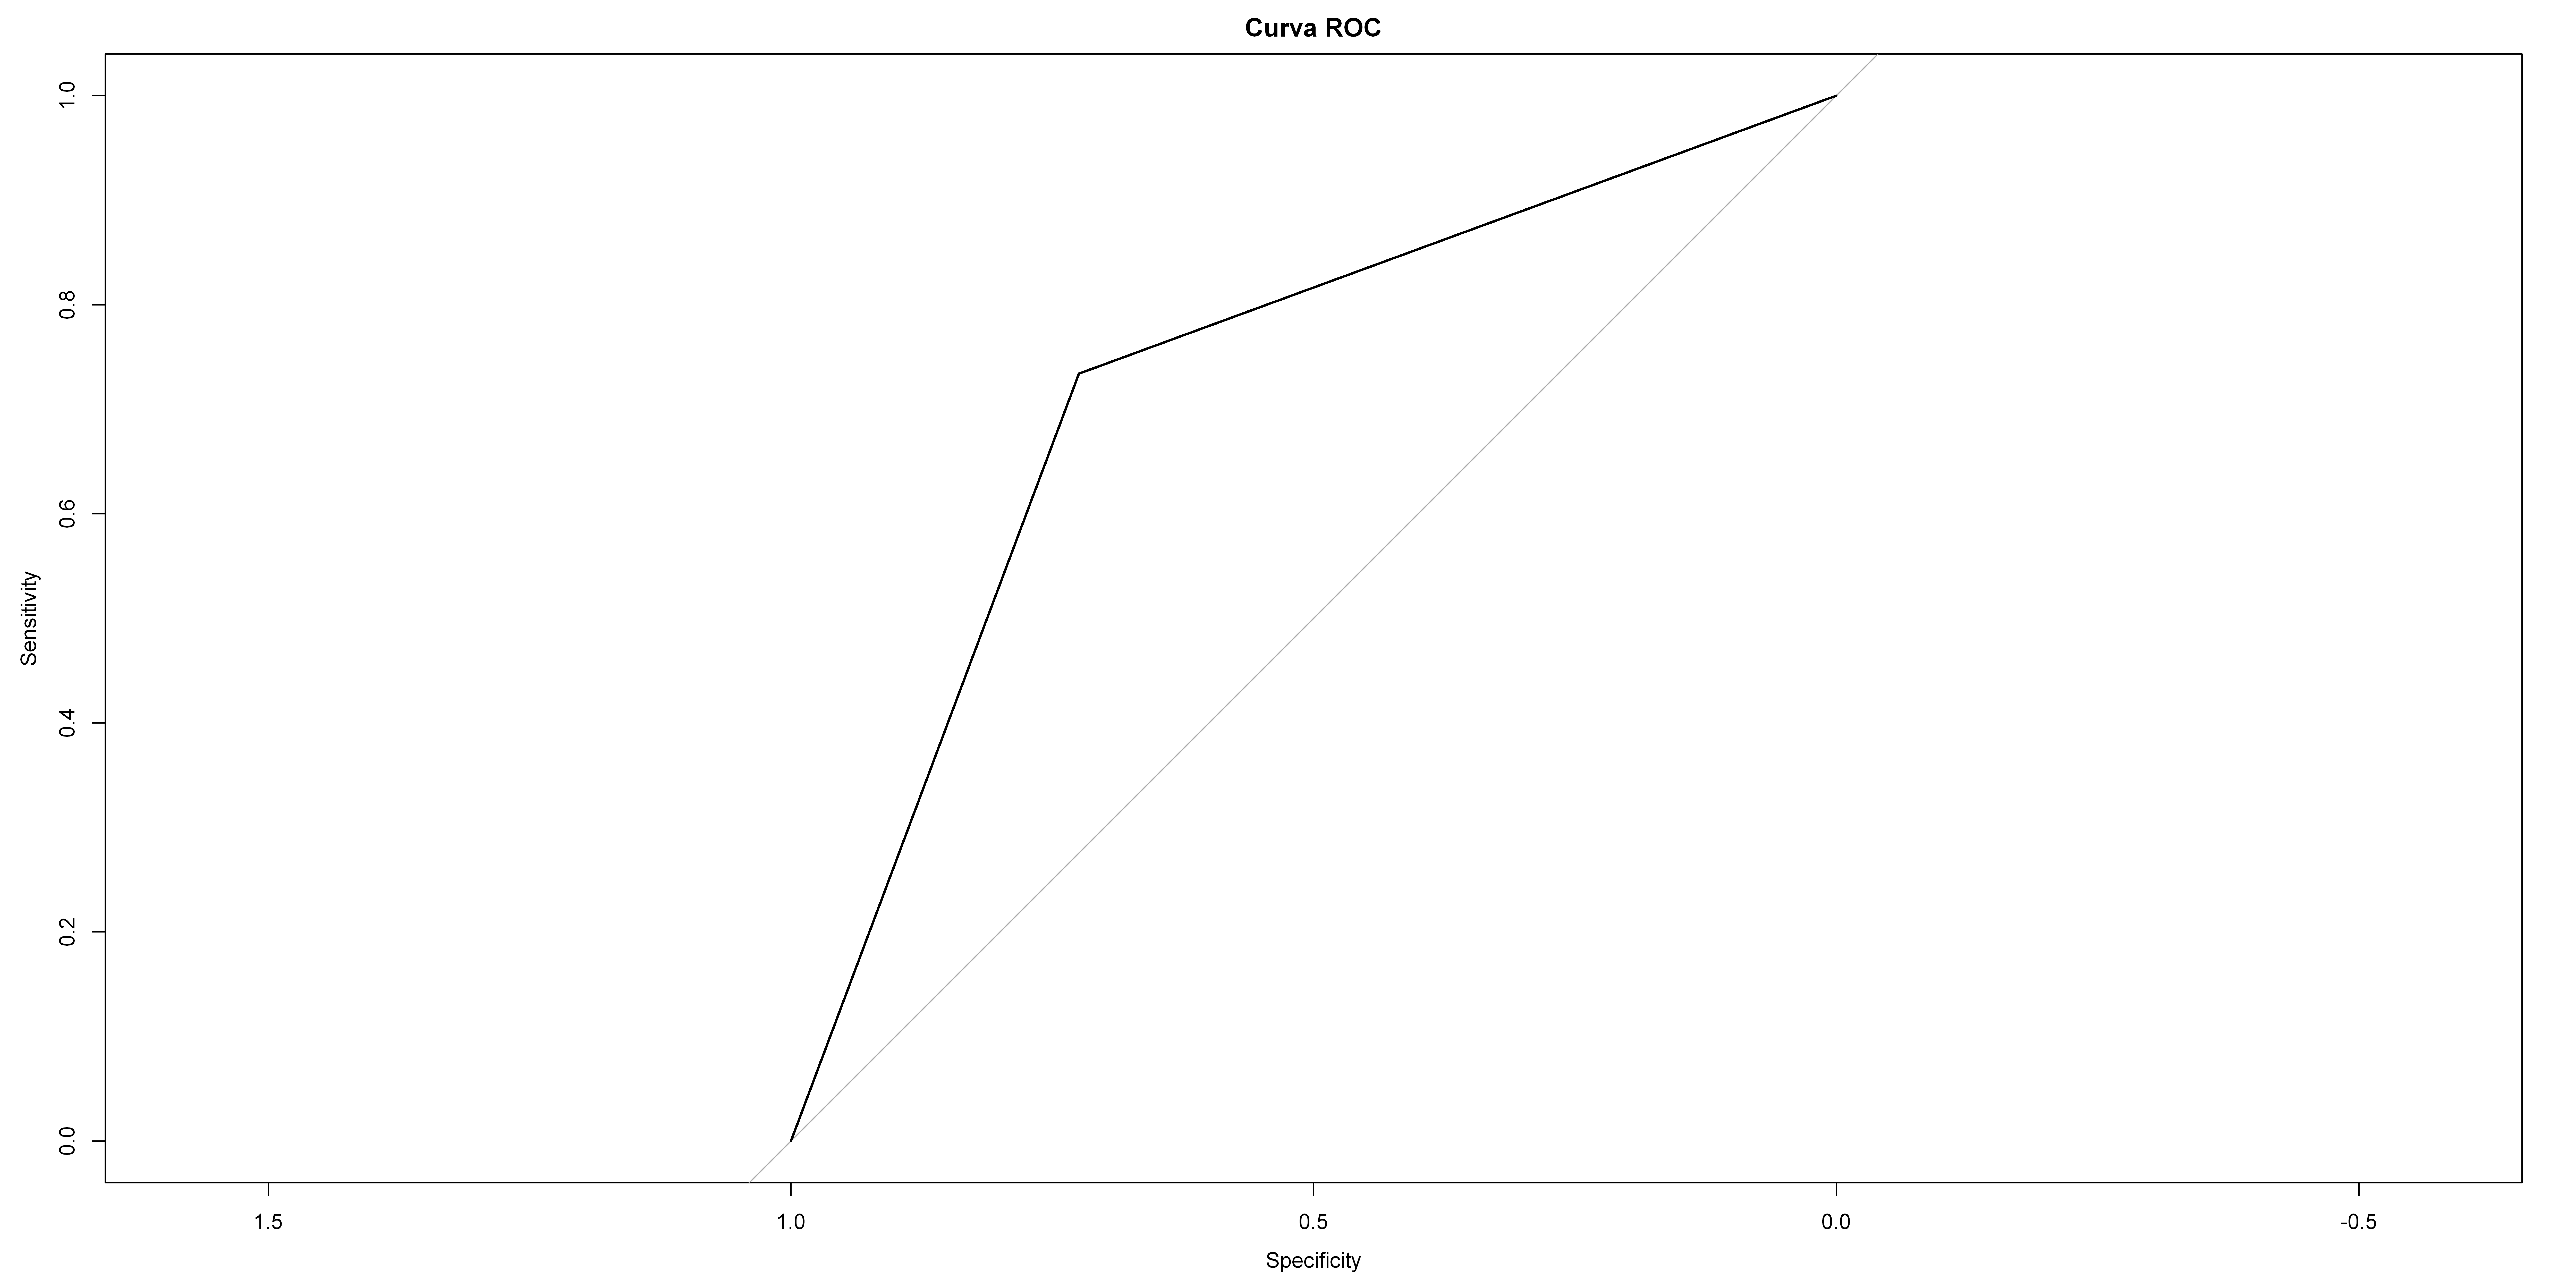

In [100]:
roc_obj <- roc(TestClasses, as.numeric(pred_regLogistic))
plot(roc_obj, main="Curva ROC")

In [101]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_regLogistic))

Data: as.numeric(pred_regLogistic) in 127 controls (TestClasses fast) < 252 cases (TestClasses NotFast).
Area under the curve: 0.7293

Setting levels: control = fast, case = NotFast

Setting direction: controls < cases



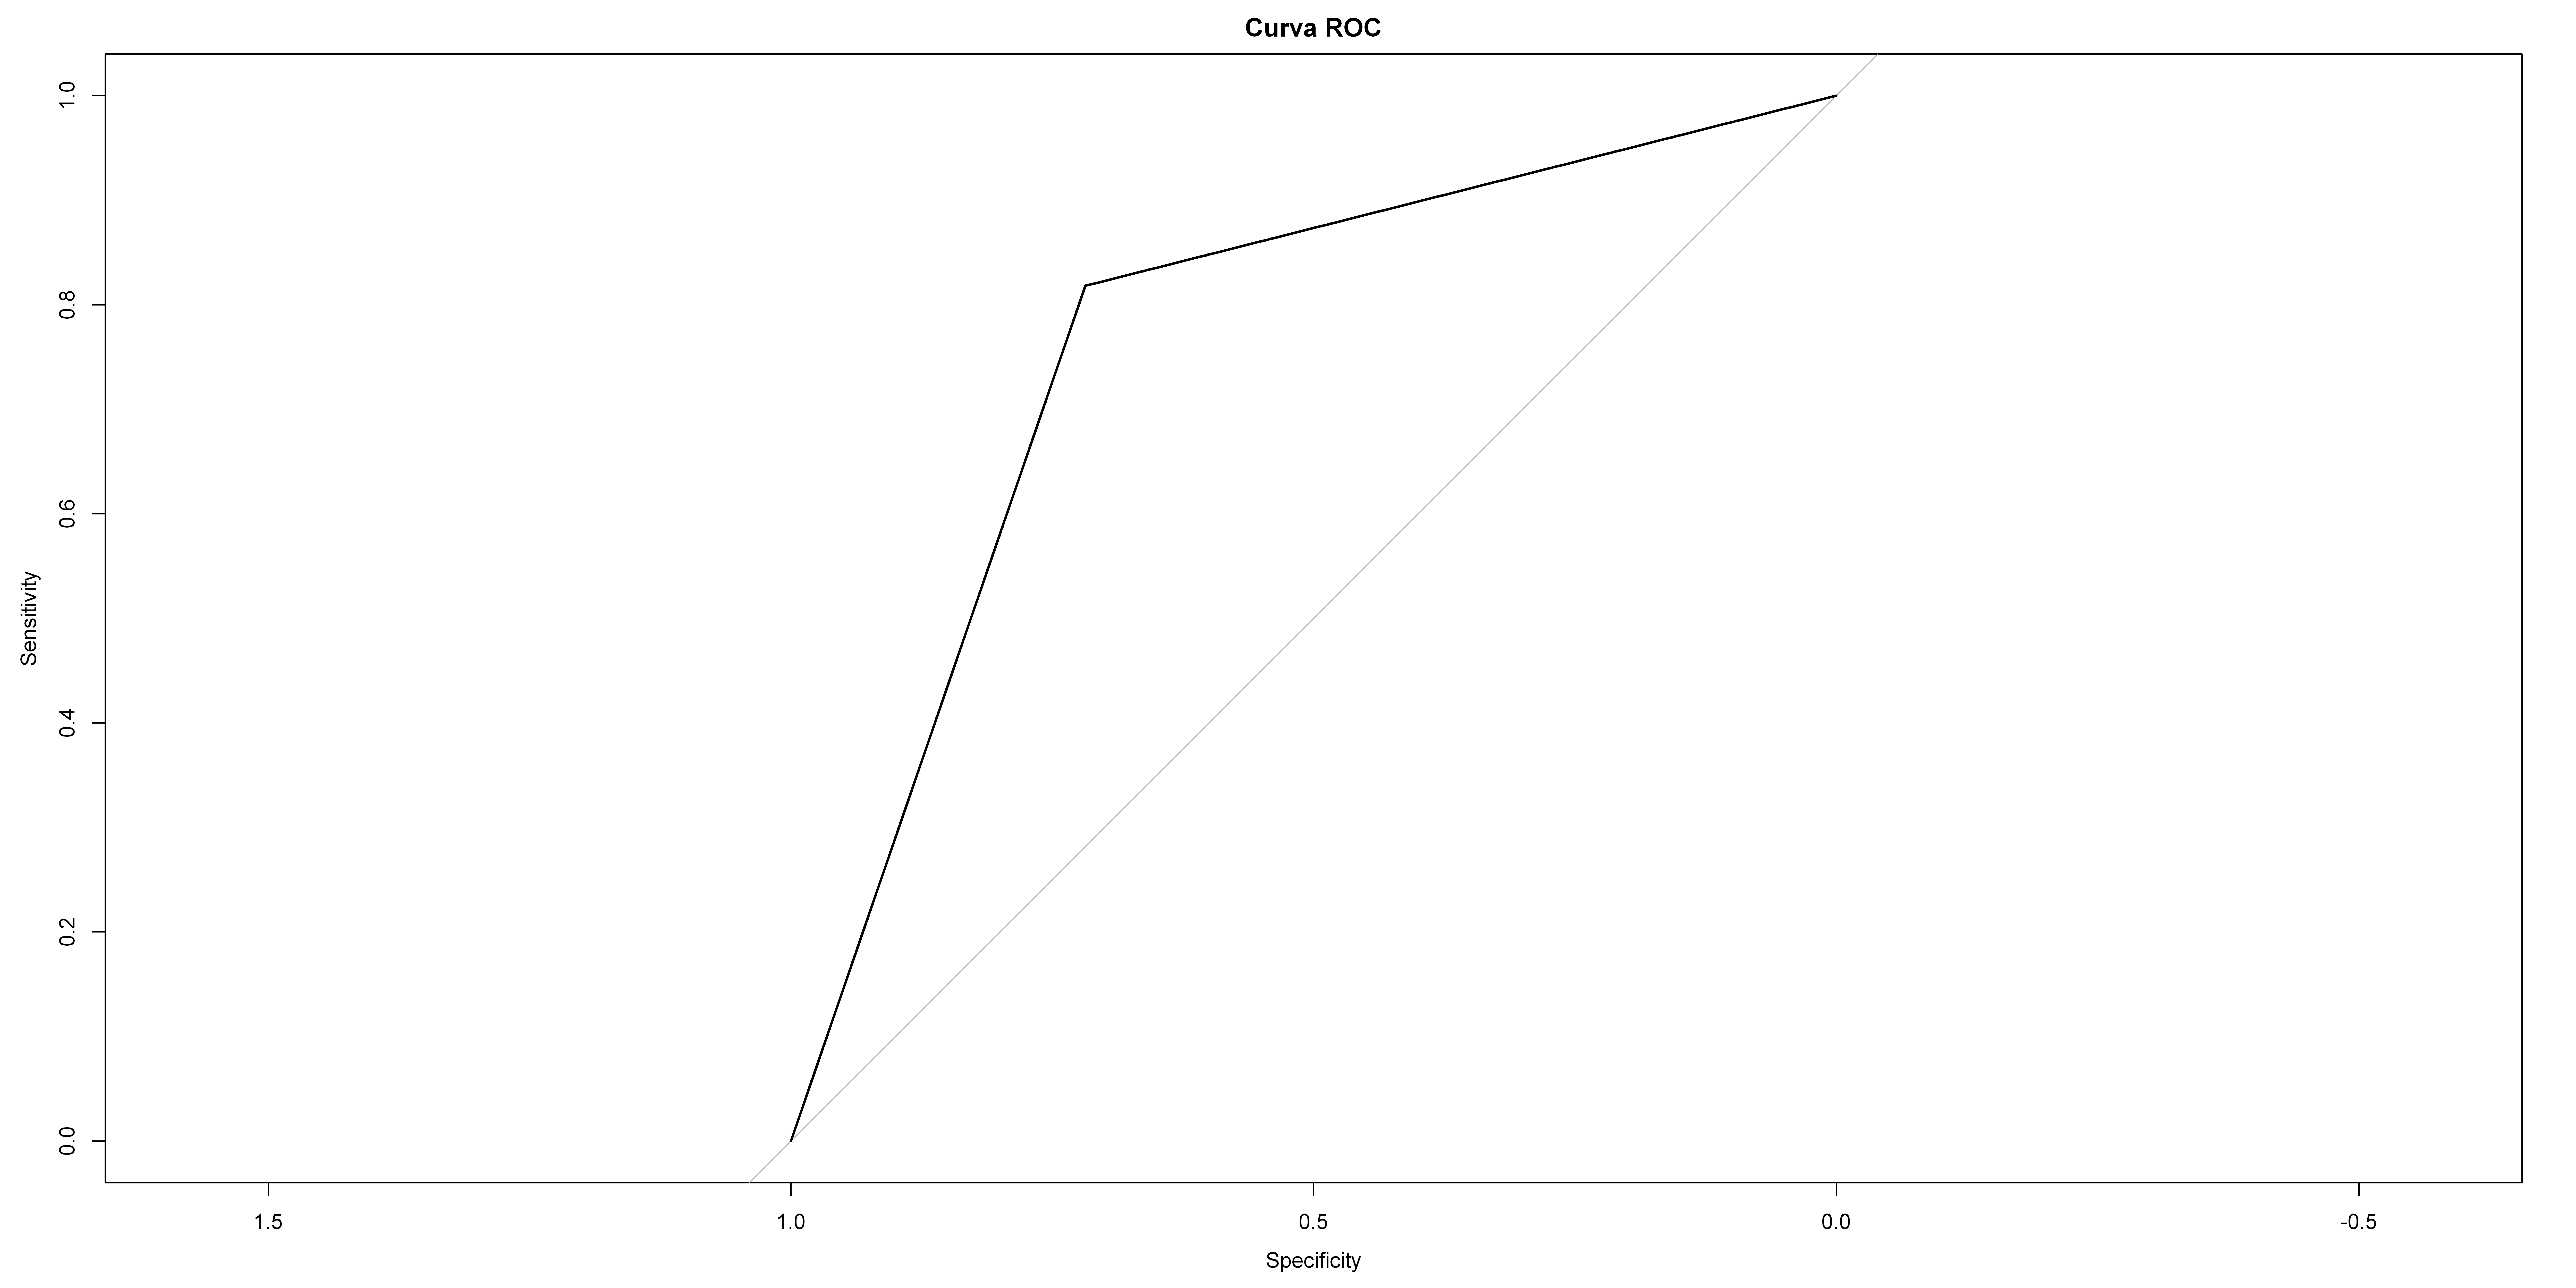

In [102]:
roc_obj <- roc(TestClasses, as.numeric(pred_logitBoost))
plot(roc_obj, main="Curva ROC")

In [103]:
roc_obj


Call:
roc.default(response = TestClasses, predictor = as.numeric(pred_logitBoost))

Data: as.numeric(pred_logitBoost) in 71 controls (TestClasses fast) < 154 cases (TestClasses NotFast).
Area under the curve: 0.7682